# **Análisis de canciones: Predicción del género musical**

# Proyecto de Machine Learning

## PARTE II: Modelos Supervisados

### by Marta Buesa

#### Febrero 2022 


![MartaBuesaProyectoML](portada_ML.png)

# 1. Importo librerias

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# 2. Importo datasets
## TRAIN

### X_train NO estandarizado

In [11]:
X_train = pd.read_csv('csvs/X_train_modified_noAcousticEnergy.csv')
X_train.drop(columns=['Unnamed: 0'], inplace=True)
X_train.head(10)

,popularity,danceability,duration_ms,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,...,key_FA,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#
0,26.0,0.481,345253.0,-1.493326,-0.329894,-8.404,1.000000,0.0388,98.37,0.372,...,1,0,0,0,0,0,0,0,0,0
1,21.0,0.242,480013.0,-0.167240,-2.180367,-21.232,0.179818,0.0349,80.19,0.117,...,0,0,0,0,0,0,1,0,0,0
2,47.0,0.798,219960.0,-3.868285,-1.703749,-11.412,0.179818,0.0363,81.02,0.677,...,0,0,0,0,0,0,0,0,1,0
3,39.0,0.573,219019.0,-1.493326,-1.883875,-6.047,1.000000,0.0374,141.92,0.606,...,0,0,0,0,0,0,0,0,1,0
4,58.0,0.427,265640.0,-0.207082,-1.777857,-3.488,0.179818,0.0472,133.93,0.539,...,0,0,1,0,0,0,0,0,0,0
5,29.0,0.410,225093.0,-2.062738,-1.164752,-2.381,1.000000,0.1410,148.11,0.152,...,0,0,0,0,0,0,0,1,0,0
6,30.0,0.624,251000.0,-4.371529,-2.154165,-7.900,0.179818,0.0313,125.10,0.272,...,0,0,0,0,0,0,0,0,0,0
7,28.0,0.481,202707.0,-1.493326,-1.111698,-4.094,0.179818,0.0509,119.91,0.700,...,0,0,0,0,0,0,0,0,0,0
8,57.0,0.921,234787.0,-1.493326,-2.566551,-9.200,1.000000,0.0823,120.04,0.317,...,0,0,0,0,0,0,0,0,0,0
9,52.0,0.497,230513.0,-5.387271,-1.754464,-4.383,1.000000,0.0445,96.50,0.231,...,0,0,0,0,0,0,0,0,1,0


### X_train estandarizado

In [12]:
X_train_scal = pd.read_csv('csvs/X_train_modified_and_scaled_noAcousticEnergy.csv')
X_train_scal.drop(columns=['Unnamed: 0'], inplace=True)
X_train_scal.head(10)

,popularity,danceability,duration_ms,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,...,key_FA,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#
0,-1.181905,-0.443239,1.288685,0.525620,2.361115,0.109311,1.342698,-0.541965,-0.746923,-0.348067,...,3.252154,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
1,-1.504704,-1.789203,2.919348,1.271448,-0.442565,-2.003693,-0.744769,-0.580440,-1.373654,-1.383412,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,5.568271,-0.287891,-0.360134,-0.266344
2,0.173848,1.341994,-0.227422,-0.810123,0.279567,-0.386161,-0.744769,-0.566629,-1.345041,0.890287,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344
3,-0.342630,0.074873,-0.238809,0.525620,0.006656,0.497551,1.342698,-0.555777,0.754407,0.602014,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344
4,0.884005,-0.747348,0.325328,1.249039,0.167285,0.919065,-0.744769,-0.459096,0.478962,0.329982,...,-0.307488,-0.258507,3.066002,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
5,-0.988226,-0.843086,-0.165311,0.205367,1.096209,1.101408,1.342698,0.466274,0.967799,-1.241306,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,3.473537,-0.360134,-0.266344
6,-0.923667,0.362087,0.148177,-1.093161,-0.402865,0.192329,-0.744769,-0.615956,0.174559,-0.754085,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
7,-1.052786,-0.443239,-0.436192,0.525620,1.176593,0.819246,-0.744769,-0.422594,-0.004359,0.983671,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
8,0.819445,2.034687,-0.048008,0.525620,-1.027677,-0.021805,1.342698,-0.112822,0.000122,-0.571377,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
9,0.496646,-0.353132,-0.099726,-1.664443,0.202728,0.771642,1.342698,-0.485733,-0.811388,-0.920552,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344


### y_train con label encoder

In [13]:
y_train = pd.read_csv('csvs/y_train_transformed_noAcousticEnergy.csv')
#y_train.drop(columns=['Unnamed: 0'], inplace=True)
y_train.head(10)

,music_genre
0,2
1,3
2,2
3,4
4,0
5,2
6,5
7,1
8,0
9,0


In [14]:
print(X_train.shape)
print(X_train_scal.shape)
print(y_train.shape)

(39719, 21)
(39719, 21)
(39719, 1)


## TEST

### X_test NO standarizado

In [15]:
X_test = pd.read_csv('csvs/X_test_modified_noAcousticEnergy.csv')
X_test.drop(columns=['Unnamed: 0'], inplace=True)
X_test.head(10)

,popularity,danceability,duration_ms,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,...,key_FA,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#
0,60.0,0.487,219019.0,-3.636274,-0.376878,-11.211,1,0.0434,105.85,0.2400,...,0,0,0,0,0,1,0,0,0,0
1,33.0,0.483,158067.0,-2.310026,-2.162823,-5.767,1,0.0738,159.78,0.7370,...,0,0,0,0,0,0,0,0,0,0
2,36.0,0.396,314800.0,-0.176439,-2.198225,-12.908,1,0.0429,150.01,0.6180,...,0,0,0,0,1,0,0,0,0,0
3,63.0,0.518,196493.0,-1.489131,-1.609438,-10.766,0,0.0297,104.53,0.5790,...,0,0,0,0,0,0,0,0,0,0
4,72.0,0.715,130929.0,-5.206685,-1.682009,-5.558,1,0.2400,176.12,0.2830,...,0,0,0,0,0,0,0,1,0,0
5,59.0,0.595,220133.0,-5.026046,-2.111965,-6.764,1,0.0540,120.08,0.0994,...,1,0,0,0,0,0,0,0,0,0
6,36.0,0.447,380933.0,-2.076720,-2.570465,-6.657,1,0.0860,153.76,0.6760,...,1,0,0,0,0,0,0,0,0,0
7,33.0,0.794,301977.0,-2.958689,-1.555897,-5.294,1,0.0779,91.04,0.7460,...,0,0,0,0,1,0,0,0,0,0
8,40.0,0.536,218040.0,-3.606730,-0.673345,-6.266,0,0.0279,144.04,0.4450,...,0,0,0,0,0,0,0,0,1,0
9,54.0,0.512,304427.0,-4.202528,-1.130103,-6.857,0,0.0343,114.96,0.2360,...,0,0,0,0,0,0,0,0,1,0


### X_test estandarizado

In [16]:
X_test_scal = pd.read_csv('csvs/X_test_modified_and_scaled_noAcousticEnergy.csv')
X_test_scal.drop(columns=['Unnamed: 0'], inplace=True)
X_test_scal.head(10)

,popularity,danceability,duration_ms,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,...,key_FA,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#
0,1.013124,-0.409449,-0.238809,-0.679633,2.289930,-0.353053,1.342698,-0.496585,-0.489059,-0.884010,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,2.924454,-0.179589,-0.287891,-0.360134,-0.266344
1,-0.729988,-0.431976,-0.976358,0.066285,-0.415983,0.543672,1.342698,-0.196678,1.370107,1.133897,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
2,-0.536309,-0.921929,0.920189,1.266274,-0.469621,-0.632580,1.342698,-0.501517,1.033299,0.650736,...,-0.307488,-0.258507,-0.326158,-0.267805,3.527221,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
3,1.206803,-0.234868,-0.511385,0.527979,0.422459,-0.279753,-1.202430,-0.631740,-0.534565,0.492389,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
4,1.787840,0.874567,-1.304742,-1.562876,0.312506,0.578098,1.342698,1.442945,1.933407,-0.709423,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,3.473537,-0.360134,-0.266344
5,0.948564,0.198769,-0.225329,-1.461280,-0.338927,0.379448,1.342698,-0.392012,0.001501,-1.454871,...,3.252154,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
6,-0.536309,-0.634715,1.720431,0.197503,-1.033607,0.397073,1.342698,-0.076320,1.162575,0.886227,...,3.252154,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
7,-0.729988,1.319468,0.765024,-0.298540,0.503579,0.621584,1.342698,-0.156230,-0.999615,1.170439,...,-0.307488,-0.258507,-0.326158,-0.267805,3.527221,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344
8,-0.278070,-0.133498,-0.250655,-0.663017,1.840748,0.461478,-1.202430,-0.649498,0.827491,-0.051674,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344
9,0.625766,-0.268658,0.794670,-0.998110,1.148707,0.364130,-1.202430,-0.586359,-0.175004,-0.900251,...,-0.307488,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344


### y_test con label encoder

In [17]:
y_test = pd.read_csv('csvs/y_test_transformed_noAcousticEnergy.csv')
y_test.drop(columns=['Unnamed: 0'], inplace=True)
y_test.head(10)

,music_genre
0,7
1,2
2,7
3,9
4,6
5,8
6,7
7,5
8,4
9,9


In [18]:
print(X_test.shape)
print(X_test_scal.shape)
print(y_test.shape)

(9943, 21)
(9943, 21)
(9943, 1)


### Generos_musicales 

* 'Alternative': 0
* 'Anime': 1 
* 'Blues': 2 
* 'Classical': 3
* 'Country': 4
* 'Electronic': 5 
* 'Hip-Hop': 6
* 'Jazz': 7
* 'Rap': 8
* 'Rock': 9

# 3. Modelos Machine Learning: Predicción Categórica

# 3.1. LOGISTIC REGRESSION

### Importo librerias necesarias

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Preparo el modelo y lo entreno

In [20]:
# Modelo Log Reg Clas
log_reg = LogisticRegression(multi_class='multinomial')

# Entreno el modelo
log_reg.fit(X_train_scal, y_train)

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(multi_class='multinomial')

### Atributos Logistic Regression

In [21]:
log_reg.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [22]:
# Number of features seen during fit
log_reg.n_features_in_

21

In [23]:
# Names of features seen during fit
log_reg.feature_names_in_

array(['popularity', 'danceability', 'duration_ms', 'instrumentalness',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence',
       'key_DO#', 'key_FA', 'key_FA#', 'key_LA', 'key_LA#', 'key_MI',
       'key_RE', 'key_RE#', 'key_SI', 'key_SOL', 'key_SOL#'], dtype=object)

In [24]:
# Intercept (a.k.a. bias) added to the decision function.
log_reg.intercept_

array([ 1.18617721, -0.67267827,  0.73213808, -1.24910011,  0.81431321,
        0.92858833, -1.22774424,  1.43585569, -1.42237598, -0.52517392])

### Predicción en TRAIN

In [25]:
# Prediccion en Train
y_train_pred = log_reg.predict(X_train_scal)
y_train_pred.shape

(39719,)

In [26]:
y_train.shape

(39719, 1)

In [27]:
def mostrar_resultados(muestra, truee, pred):
    '''
    Función que muestra los resultados del modelo: matriz de confusión y reporte de aciertos en laclasificación entre los generos musicales
    '''
    c_matrix = confusion_matrix(truee, pred)
    plt.figure(figsize=(15,10))
    if muestra == 'TRAIN':
        sns.heatmap(c_matrix/c_matrix.sum(axis=1), annot=True,cmap='Blues');
    else:
        sns.heatmap(c_matrix/c_matrix.sum(axis=1), annot=True,cmap='Greens');
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print(classification_report(truee, pred))

Resultados Logistic Regression en TRAIN:


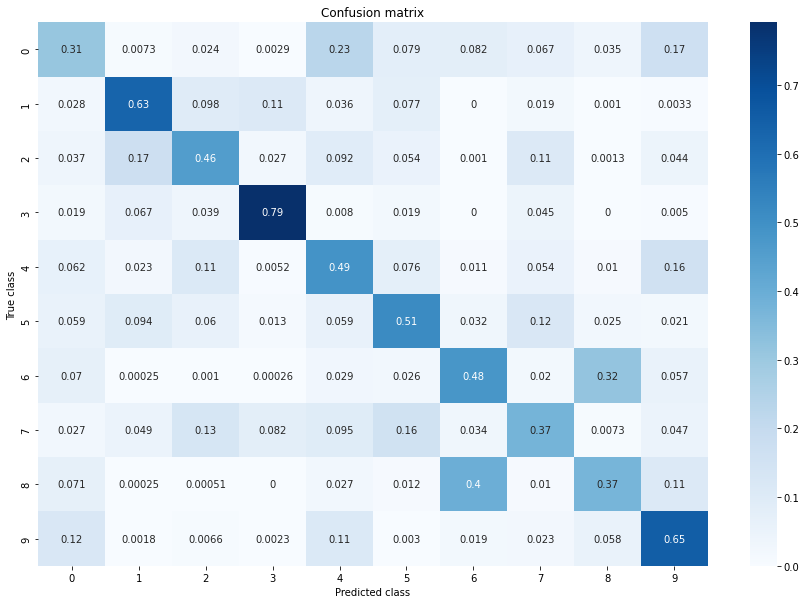

              precision    recall  f1-score   support

           0       0.38      0.31      0.34      3995
           1       0.60      0.63      0.62      3989
           2       0.49      0.46      0.47      3951
           3       0.77      0.79      0.78      3852
           4       0.42      0.49      0.45      4011
           5       0.51      0.51      0.51      3975
           6       0.46      0.48      0.47      3984
           7       0.44      0.37      0.41      3999
           8       0.45      0.37      0.41      3976
           9       0.52      0.65      0.58      3987

    accuracy                           0.51     39719
   macro avg       0.50      0.51      0.50     39719
weighted avg       0.50      0.51      0.50     39719



In [28]:
# Prediccion en TRAIN
print('Resultados Logistic Regression en TRAIN:')
mostrar_resultados('TRAIN', y_train, y_train_pred)

#### **Métrica de precisión** 
Se mide la calidad del modelo de machine learning en tareas de clasificación, es decir **los identificados como True Positive sobre el total de los predichos positivos**:

**precision = {TP}/{TP + FP}**


#### **Métrica de recall(exhaustividad)** 
Informa la cantidad que el modelo de machine learning es capaz de identificar, es decir los **identificados como True Positive sobre el total real de positivos**:

**recall = {TP}{TP + FN}**

#### **Puntuación F1** 
Es una media armónica de precisión y recuperación, donde una puntuación F1 alcanza su mejor valor en 1 y su peor puntuación en 0. La contribución relativa de precisión y recuperación a la puntuación F1 es igual. La fórmula para la puntuación F1 es:

**F1 = 2 * (precision * recall) / (precision + recall)**

En el caso de multiclase y multietiqueta, es el promedio de la puntuación F1 de cada clase con ponderación según el average parámetro.


#### **Promedios informados** incluyen:
* **Macro average** (promedio macro): promedio de la media no ponderada por etiqueta
* **Weighted average** (promedio ponderado) promedio de la media ponderada por soporte por etiqueta

#### **Support**: The number of occurrences of each label in y_true.

In [29]:
acierto = accuracy_score(y_train, y_train_pred)
error = 1 - acierto

print('Score Logistic Regression en TRAIN:\n-----------------------------')
print("Accuracy train:", round(acierto*100, 2), "%")
print("Error train:", round(error*100, 2), "%")

Score Logistic Regression en TRAIN:
-----------------------------
Accuracy train: 50.66 %
Error train: 49.34 %


### Predicción en TEST

In [30]:
# Prediccion en Test
y_test_pred = log_reg.predict(X_test_scal)
y_test_pred.shape

(9943,)

Resultados Logistic Regression en TEST:


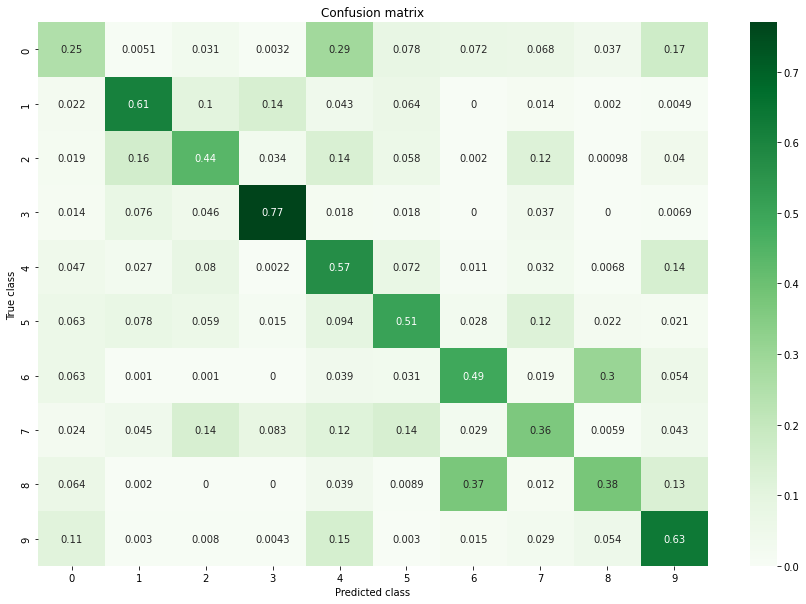

              precision    recall  f1-score   support

           0       0.37      0.25      0.30      1002
           1       0.61      0.61      0.61       987
           2       0.48      0.44      0.46      1000
           3       0.73      0.77      0.75       930
           4       0.38      0.57      0.46       986
           5       0.52      0.51      0.51      1008
           6       0.48      0.49      0.48      1015
           7       0.45      0.36      0.40       981
           8       0.47      0.38      0.42      1023
           9       0.51      0.63      0.56      1011

    accuracy                           0.50      9943
   macro avg       0.50      0.50      0.50      9943
weighted avg       0.50      0.50      0.49      9943



In [31]:
print('Resultados Logistic Regression en TEST:')
mostrar_resultados('TEST',y_test, y_test_pred)

In [32]:
acierto = accuracy_score(y_test, y_test_pred)
error = 1 - acierto

print('Score Logistic Regression en TEST:\n-----------------------------')
print("Accuracy test:", round(acierto*100, 2), "%")
print("Error test:", round(error*100, 2), "%")

Score Logistic Regression en TEST:
-----------------------------
Accuracy test: 49.89 %
Error test: 50.11 %


### Guardo CSV con resultados obtenidos en Logistic Regression en TEST

In [33]:
results_log = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_test_pred,output_dict=True)).transpose()

results_log = results_log.add_prefix('LogReg_')
results_log.rename(columns={'LogReg_support' : 'Support (Registros)'}, inplace=True)
results_log = results_log.reindex(columns=['Support (Registros)','LogReg_precision','LogReg_recall','LogReg_f1-score'])
results_log

,Support (Registros),LogReg_precision,LogReg_recall,LogReg_f1-score
0,1002.000000,0.373156,0.252495,0.301190
1,987.000000,0.606673,0.607903,0.607287
2,1000.000000,0.482948,0.439000,0.459927
3,930.000000,0.729124,0.769892,0.748954
4,986.000000,0.383095,0.569980,0.458214
5,1008.000000,0.515641,0.506944,0.511256
6,1015.000000,0.481086,0.488670,0.484848
7,981.000000,0.445274,0.364934,0.401120
8,1023.000000,0.465621,0.377322,0.416847
9,1011.000000,0.506730,0.633037,0.562885


In [34]:
results_log.to_csv('models/logistic_regresion_report_on_test_colifree.csv', index= True)

### Tabla scores obtenidos

Quiero comparar resultados obtenidos en cada modelo, asi que creo un data frame donde almacenaré los accuracys obtenidos en cada uno

In [35]:
scores_obtained = {'Regresión logistica(%)': [accuracy_score(y_train, y_train_pred)*100,
                    accuracy_score(y_test, y_test_pred)*100]}

scores_obtained = pd.DataFrame(scores_obtained, index=['Accuracy_train', 'Accuracy_test'])

scores_obtained

,Regresión logistica(%)
Accuracy_train,50.655857
Accuracy_test,49.894398


# 3.2. DECISION TREE CLASSIFIER

### Importo librerias necesarias

In [36]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

### Preparo y entreno modelo Decision Tree

In [37]:
# Creo modelo
tree_clf = DecisionTreeClassifier()

# Entreno
tree_clf.fit(X_train_scal, y_train)

DecisionTreeClassifier()

#### Grid Search: para ver cuanta profundidad y cantidad de muestras darle al árbol de decisión, para que no caiga en overfitting

In [38]:
# Pruebo profundidad maxima de 2, 3, 4, 5, 6, 7, 8, 9, 10
# Cantidad de muestras en las que se divide para llegar a una hoja
parameters = {'max_depth': [5,6,7,8,9,10],
'min_samples_leaf': np.arange(1,10)}

# Validacion cruzada con cv= 10, para suavizar el overfitting
grid_tree = GridSearchCV(tree_clf, parameters, scoring= 'accuracy', cv=10)

grid_tree.fit(X_train_scal, y_train)

print(grid_tree.best_estimator_)
print(grid_tree.best_score_)
print(grid_tree.best_params_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=8)
0.5058534204300413
{'max_depth': 10, 'min_samples_leaf': 8}


#### Aplico el modelo con la max_depth y min_samples_leaf que me devuelve el gridsearch que sería mejor

In [39]:
# modelo Deccision Tree Classifier
tree10_1 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=1)

#  Entreno el modelo
tree10_1.fit(X_train_scal, y_train)

DecisionTreeClassifier(max_depth=10)

### Atributos del árbol de Decisión

In [40]:
tree10_1.feature_names_in_

array(['popularity', 'danceability', 'duration_ms', 'instrumentalness',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence',
       'key_DO#', 'key_FA', 'key_FA#', 'key_LA', 'key_LA#', 'key_MI',
       'key_RE', 'key_RE#', 'key_SI', 'key_SOL', 'key_SOL#'], dtype=object)

In [41]:
tree10_1.feature_importances_

array([3.65107006e-01, 9.56250079e-02, 2.50324063e-02, 8.92810933e-02,
       8.93554853e-03, 2.10586204e-01, 7.67340304e-03, 1.25554999e-01,
       1.86387240e-02, 4.89533978e-02, 9.24443713e-04, 4.88542036e-04,
       1.37990715e-04, 7.31977062e-04, 7.07202414e-05, 0.00000000e+00,
       4.40206965e-04, 2.05946490e-04, 8.23528527e-04, 5.32983614e-04,
       2.55871302e-04])

In [42]:
order_fea_imp_tree = pd.Series(tree10_1.feature_importances_, index=X_train_scal.columns).nlargest(10)[-1::-1]
order_fea_imp_tree

mode                0.007673
liveness            0.008936
tempo               0.018639
duration_ms         0.025032
valence             0.048953
instrumentalness    0.089281
danceability        0.095625
speechiness         0.125555
loudness            0.210586
popularity          0.365107
dtype: float64

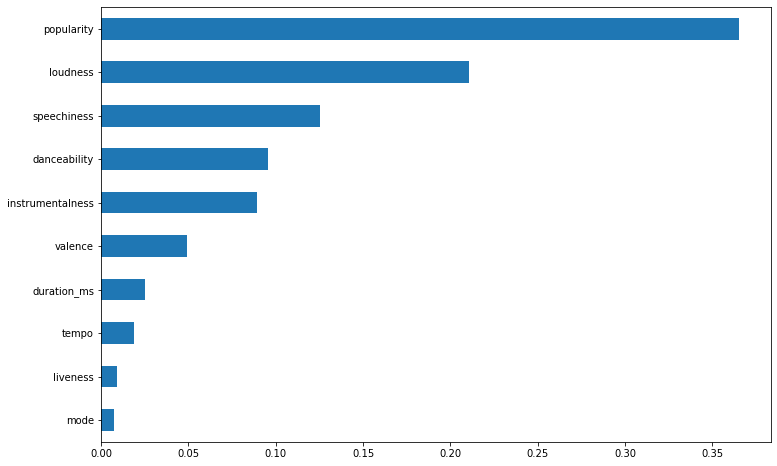

In [43]:
order_fea_imp_tree.plot(kind='barh', figsize= (12,8));

### Visualización del árbol

In [44]:
y_train= pd.DataFrame(y_train)

generos_music = y_train.music_genre.unique()
generos_music

array([2, 3, 4, 0, 5, 1, 8, 7, 9, 6], dtype=int64)

In [45]:
train_complete = pd.concat([X_train_scal, y_train], axis=1)
train_complete.head()

,popularity,danceability,duration_ms,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,...,key_FA#,key_LA,key_LA#,key_MI,key_RE,key_RE#,key_SI,key_SOL,key_SOL#,music_genre
0,-1.181905,-0.443239,1.288685,0.525620,2.361115,0.109311,1.342698,-0.541965,-0.746923,-0.348067,...,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344,2
1,-1.504704,-1.789203,2.919348,1.271448,-0.442565,-2.003693,-0.744769,-0.580440,-1.373654,-1.383412,...,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,5.568271,-0.287891,-0.360134,-0.266344,3
2,0.173848,1.341994,-0.227422,-0.810123,0.279567,-0.386161,-0.744769,-0.566629,-1.345041,0.890287,...,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344,2
3,-0.342630,0.074873,-0.238809,0.525620,0.006656,0.497551,1.342698,-0.555777,0.754407,0.602014,...,-0.258507,-0.326158,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,2.776744,-0.266344,4
4,0.884005,-0.747348,0.325328,1.249039,0.167285,0.919065,-0.744769,-0.459096,0.478962,0.329982,...,-0.258507,3.066002,-0.267805,-0.283509,-0.341944,-0.179589,-0.287891,-0.360134,-0.266344,0


In [46]:
X_train_scal.columns[0:2].tolist()

['popularity', 'danceability']

In [47]:
train_complete.music_genre.unique().astype('str')

array(['2', '3', '4', '0', '5', '1', '8', '7', '9', '6'], dtype='<U21')

In [48]:
train_complete.music_genre.unique().astype('str').tolist()

['2', '3', '4', '0', '5', '1', '8', '7', '9', '6']

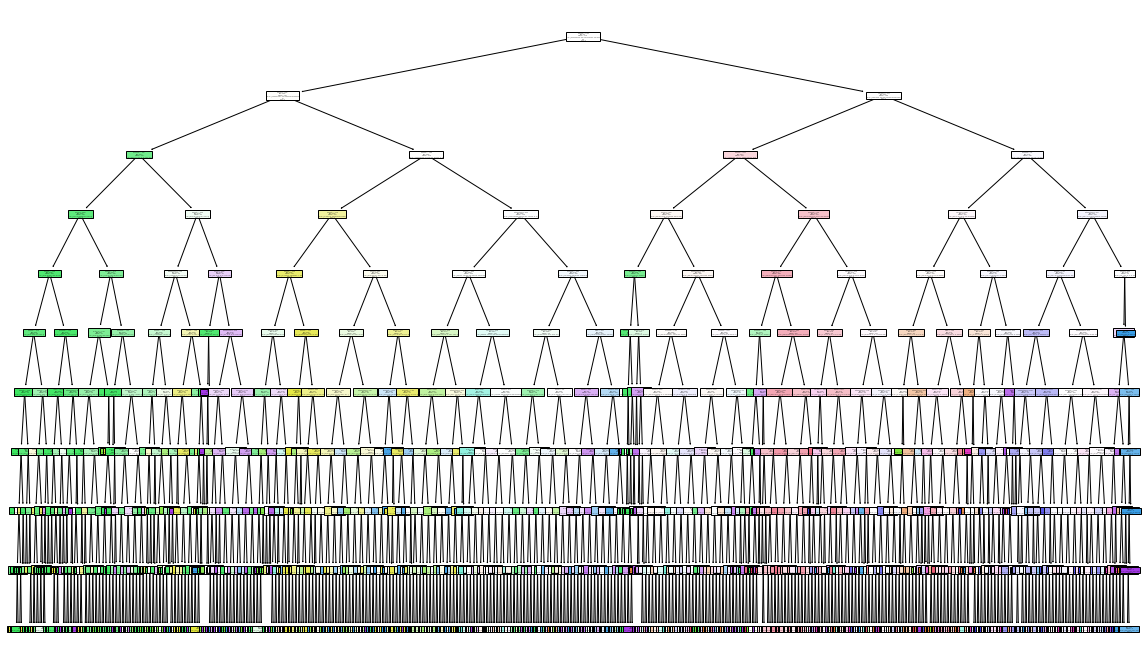

In [49]:

# QUIERO VISUALIZAR el arbol.................
plt.figure(figsize = (20,12))

sklearn.tree.plot_tree(tree10_1, 
                       feature_names=X_train_scal.columns.tolist(),
                        class_names = train_complete.music_genre.unique().astype('str').tolist(),
                        filled = True);


### Predicción sobre TRAIN

In [50]:
# Prediccion sobre TRAIN
tree_predictions_train = tree10_1.predict(X_train_scal)

Resultados Decision Tree en TRAIN:


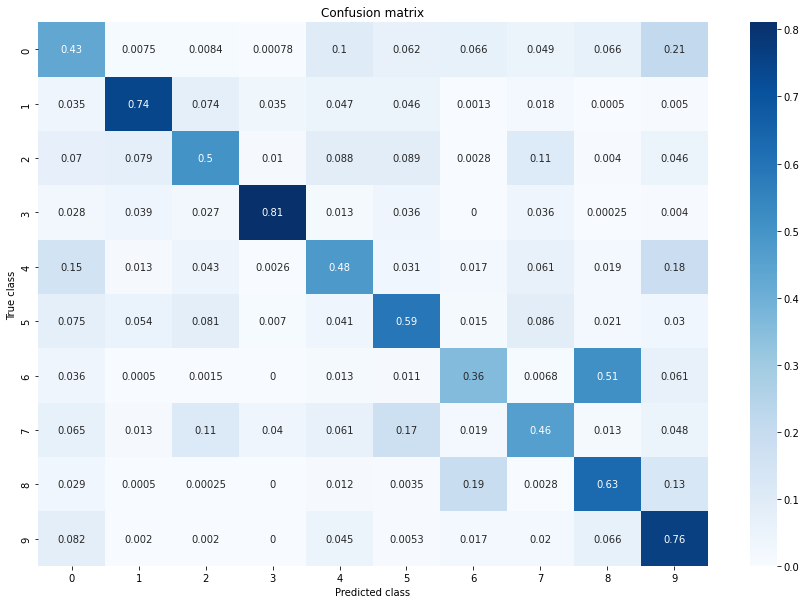

              precision    recall  f1-score   support

           0       0.43      0.43      0.43      3995
           1       0.78      0.74      0.76      3989
           2       0.59      0.50      0.54      3951
           3       0.89      0.81      0.85      3852
           4       0.53      0.48      0.51      4011
           5       0.56      0.59      0.58      3975
           6       0.52      0.36      0.42      3984
           7       0.55      0.46      0.50      3999
           8       0.47      0.63      0.54      3976
           9       0.51      0.76      0.61      3987

    accuracy                           0.58     39719
   macro avg       0.58      0.58      0.57     39719
weighted avg       0.58      0.58      0.57     39719



In [51]:
print('Resultados Decision Tree en TRAIN:')
mostrar_resultados('TRAIN', y_train, tree_predictions_train)

In [52]:
acierto = accuracy_score(y_train, tree_predictions_train)
error = 1 - acierto

print('Score con Decision Tree en TRAIN:\n-----------------------------')
print('Accuracy Train:', round(acierto*100,2),'%')
print('Error Train :', round(error*100,2),'%')

Score con Decision Tree en TRAIN:
-----------------------------
Accuracy Train: 57.54 %
Error Train : 42.46 %


### Predicción sobre TEST

In [53]:
# Prediccion en Test
tree_predictions_test = tree10_1.predict(X_test_scal)
tree_predictions_test.shape

(9943,)

Resultados Decision Tree en TEST:


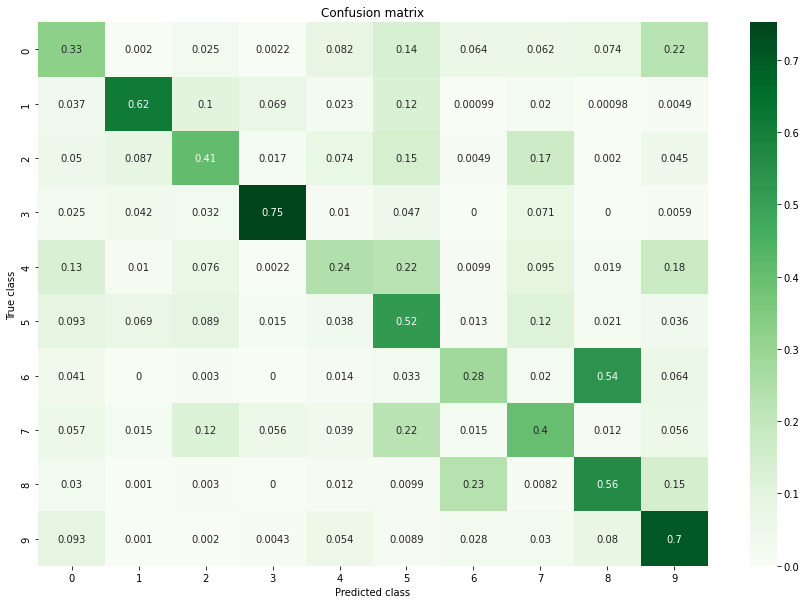

              precision    recall  f1-score   support

           0       0.37      0.33      0.35      1002
           1       0.73      0.62      0.67       987
           2       0.47      0.41      0.44      1000
           3       0.82      0.75      0.78       930
           4       0.41      0.24      0.30       986
           5       0.35      0.52      0.42      1008
           6       0.44      0.28      0.34      1015
           7       0.40      0.40      0.40       981
           8       0.43      0.56      0.49      1023
           9       0.48      0.70      0.57      1011

    accuracy                           0.48      9943
   macro avg       0.49      0.48      0.48      9943
weighted avg       0.49      0.48      0.47      9943



In [54]:
print('Resultados Decision Tree en TEST:')
mostrar_resultados('TEST', y_test, tree_predictions_test)

In [55]:
acierto = accuracy_score(y_test, tree_predictions_test)
error = 1 - acierto

print('Score Decision Tree en TEST:\n-----------------------------')
print("Accuracy test:", round(acierto*100, 2), "%")
print("Error test:", round(error*100, 2), "%")

Score Decision Tree en TEST:
-----------------------------
Accuracy test: 47.89 %
Error test: 52.11 %


### Guardo CSV con resultados obtenidos en Decision Tree en TEST

In [56]:
results_tree = pd.DataFrame(classification_report(y_true = y_test, y_pred = tree_predictions_test,output_dict=True)).transpose()

results_tree = results_tree.add_prefix('DecTree_')

results_models = pd.concat([results_log, results_tree.iloc[:,0:-1]], axis=1)

results_models

,Support (Registros),LogReg_precision,LogReg_recall,LogReg_f1-score,DecTree_precision,DecTree_recall,DecTree_f1-score
0,1002.000000,0.373156,0.252495,0.301190,0.369196,0.325349,0.345889
1,987.000000,0.606673,0.607903,0.607287,0.730769,0.616008,0.668499
2,1000.000000,0.482948,0.439000,0.459927,0.472769,0.408000,0.438003
3,930.000000,0.729124,0.769892,0.748954,0.819461,0.751613,0.784072
4,986.000000,0.383095,0.569980,0.458214,0.410035,0.240365,0.303069
5,1008.000000,0.515641,0.506944,0.511256,0.352981,0.516865,0.419485
6,1015.000000,0.481086,0.488670,0.484848,0.437026,0.283744,0.344086
7,981.000000,0.445274,0.364934,0.401120,0.400000,0.397554,0.398773
8,1023.000000,0.465621,0.377322,0.416847,0.429425,0.562072,0.486876
9,1011.000000,0.506730,0.633037,0.562885,0.478114,0.702275,0.568910


In [57]:
results_tree.to_csv('models/decision_tree_report_on_test_colifree.csv', index= True)

In [58]:
results_models.to_csv('models/models_report_on_test_colifree.csv', index= True)

### Tabla scores obtenidos

Almaceno los accuracys obtenidos en Decision Tree

In [59]:
scores_obtained['Decision Tree(%)'] = [accuracy_score(y_train, tree_predictions_train)*100,
                                    accuracy_score(y_test, tree_predictions_test)*100]

scores_obtained

,Regresión logistica(%),Decision Tree(%)
Accuracy_train,50.655857,57.539213
Accuracy_test,49.894398,47.892990


# 3.3. SUPPORT VECTOR MACHINE (SVM)

### Importo librerias necesarias

In [60]:
from sklearn.svm import LinearSVC

### Preparo y entreno el modelo Support Vector Machine

In [61]:
# Parámetro C: Cuanto menor es C, más es la flexibilidad/tolerante es mi modelo, y por tanto generalizará mejor
svm_lin1 = LinearSVC(C=1, loss= "hinge")
svm_lin2 = LinearSVC(C=100, loss= "hinge")


In [62]:
# Entrenamiento
svm_lin1.fit(X_train_scal, y_train.values.ravel())
svm_lin2.fit(X_train_scal, y_train.values.ravel())


C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=100, loss='hinge')

### Predicción sobre Train

In [63]:
# Prediccion sobre TRAIN
svm_lin1_predictions_train = svm_lin1.predict(X_train_scal)
svm_lin2_predictions_train = svm_lin2.predict(X_train_scal)

Resultados SUPPORT VECTOR MACHINE Lineal1 en TRAIN:


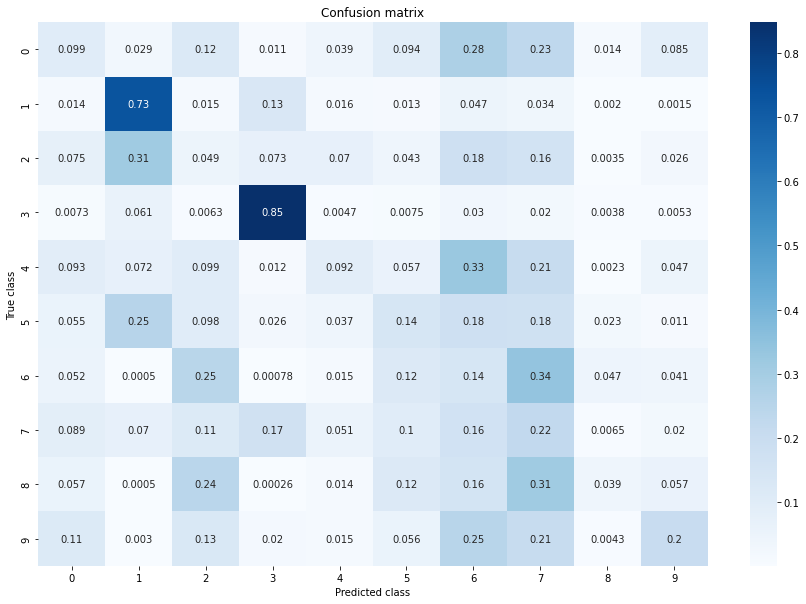

              precision    recall  f1-score   support

           0       0.15      0.10      0.12      3995
           1       0.48      0.73      0.58      3989
           2       0.04      0.05      0.05      3951
           3       0.66      0.85      0.74      3852
           4       0.26      0.09      0.14      4011
           5       0.19      0.14      0.16      3975
           6       0.08      0.14      0.10      3984
           7       0.12      0.22      0.15      3999
           8       0.27      0.04      0.07      3976
           9       0.41      0.20      0.27      3987

    accuracy                           0.26     39719
   macro avg       0.27      0.26      0.24     39719
weighted avg       0.26      0.26      0.24     39719



Resultados SUPPORT VECTOR MACHINE Lineal2 en TRAIN:


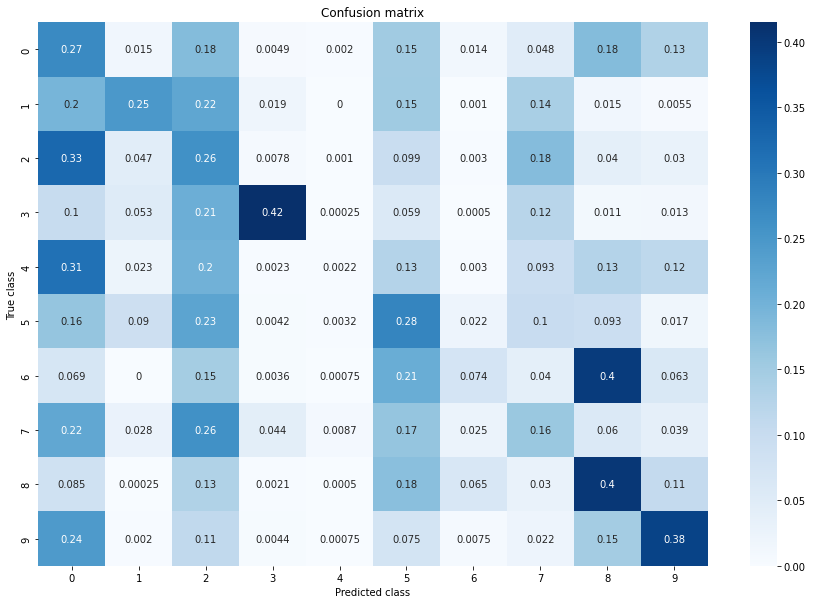

              precision    recall  f1-score   support

           0       0.14      0.27      0.18      3995
           1       0.49      0.25      0.33      3989
           2       0.13      0.26      0.18      3951
           3       0.82      0.42      0.55      3852
           4       0.12      0.00      0.00      4011
           5       0.19      0.28      0.22      3975
           6       0.34      0.07      0.12      3984
           7       0.17      0.16      0.16      3999
           8       0.27      0.40      0.33      3976
           9       0.43      0.38      0.40      3987

    accuracy                           0.25     39719
   macro avg       0.31      0.25      0.25     39719
weighted avg       0.31      0.25      0.25     39719



In [64]:
print('Resultados SUPPORT VECTOR MACHINE Lineal1 en TRAIN:')
mostrar_resultados('TRAIN', y_train, svm_lin1_predictions_train)

print('\n\nResultados SUPPORT VECTOR MACHINE Lineal2 en TRAIN:')
mostrar_resultados('TRAIN', y_train, svm_lin2_predictions_train)

In [65]:
acierto = accuracy_score(y_train, svm_lin1_predictions_train)
error = 1 - acierto

print('Score con SVM Lineal1 en TRAIN:\n-----------------------------')
print('Accuracy Train:', round(acierto*100,2),'%')
print('Error Train :', round(error*100,2),'%')


acierto = accuracy_score(y_train, svm_lin2_predictions_train)
error = 1 - acierto

print('\n\nScore con SVM Lineal2 en TRAIN:\n-----------------------------')
print('Accuracy Train:', round(acierto*100,2),'%')
print('Error Train :', round(error*100,2),'%')

Score con SVM Lineal1 en TRAIN:
-----------------------------
Accuracy Train: 25.51 %
Error Train : 74.49 %


Score con SVM Lineal2 en TRAIN:
-----------------------------
Accuracy Train: 24.89 %
Error Train : 75.11 %


### Predicción sobre TEST

In [66]:
# Prediccion en Test

svm_lin1_predictions_test = svm_lin1.predict(X_test_scal)
svm_lin2_predictions_test = svm_lin2.predict(X_test_scal)

Resultados SVM Lineal1 en TEST:


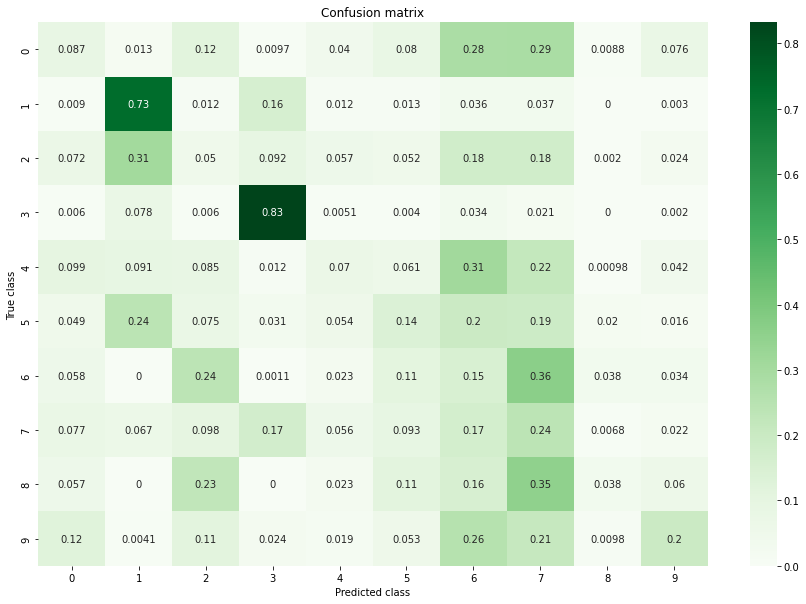

              precision    recall  f1-score   support

           0       0.14      0.09      0.11      1002
           1       0.48      0.73      0.58       987
           2       0.05      0.05      0.05      1000
           3       0.63      0.83      0.71       930
           4       0.19      0.07      0.10       986
           5       0.19      0.14      0.16      1008
           6       0.09      0.15      0.11      1015
           7       0.11      0.24      0.15       981
           8       0.31      0.04      0.07      1023
           9       0.42      0.20      0.27      1011

    accuracy                           0.25      9943
   macro avg       0.26      0.25      0.23      9943
weighted avg       0.26      0.25      0.23      9943



Resultados SVM Lineal2 en TEST:


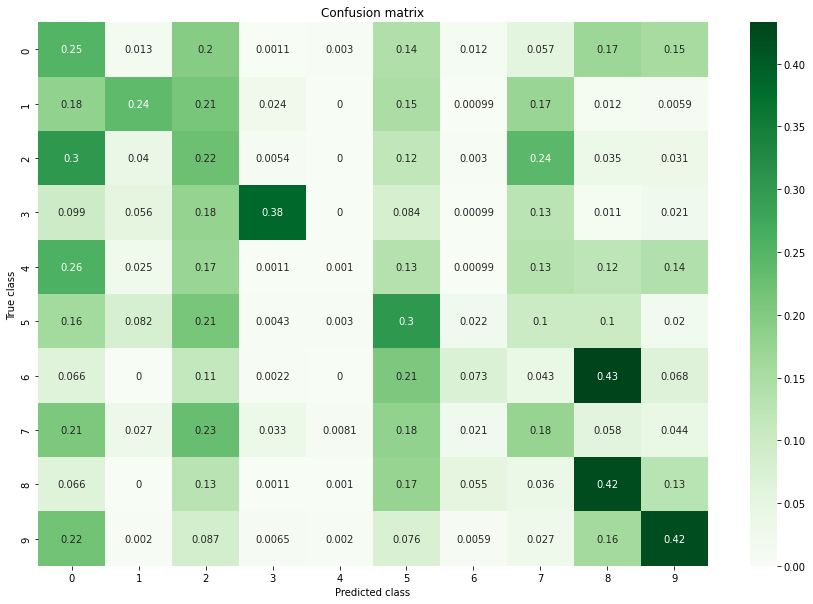

              precision    recall  f1-score   support

           0       0.14      0.25      0.18      1002
           1       0.49      0.24      0.32       987
           2       0.13      0.22      0.16      1000
           3       0.83      0.38      0.53       930
           4       0.06      0.00      0.00       986
           5       0.19      0.30      0.24      1008
           6       0.38      0.07      0.12      1015
           7       0.16      0.18      0.17       981
           8       0.28      0.42      0.33      1023
           9       0.41      0.42      0.41      1011

    accuracy                           0.25      9943
   macro avg       0.31      0.25      0.25      9943
weighted avg       0.30      0.25      0.24      9943



In [67]:
print('Resultados SVM Lineal1 en TEST:')
mostrar_resultados('TEST', y_test, svm_lin1_predictions_test)

print('\n\nResultados SVM Lineal2 en TEST:')
mostrar_resultados('TEST', y_test, svm_lin2_predictions_test)

In [68]:
acierto = accuracy_score(y_test, svm_lin1_predictions_test)
error = 1 - acierto

print('Score con SVM Lineal1 en TEST:\n-----------------------------')
print('Accuracy Test:', round(acierto*100,2),'%')
print('Error Test :', round(error*100,2),'%')


acierto = accuracy_score(y_test, svm_lin2_predictions_test)
error = 1 - acierto

print('\n\nScore con SVM Lineal2 en TEST:\n-----------------------------')
print('Accuracy Test:', round(acierto*100,2),'%')
print('Error Test :', round(error*100,2),'%')

Score con SVM Lineal1 en TEST:
-----------------------------
Accuracy Test: 24.79 %
Error Test : 75.21 %


Score con SVM Lineal2 en TEST:
-----------------------------
Accuracy Test: 24.88 %
Error Test : 75.12 %


### Guardo CSV con resultados obtenidos en SVM en TEST

In [69]:
results_svm1 = pd.DataFrame(classification_report(y_true = y_test, y_pred = svm_lin1_predictions_test,output_dict=True)).transpose()

results_svm1 = results_svm1.add_prefix('SVM_Lin1_')

results_svm2 = pd.DataFrame(classification_report(y_true = y_test, y_pred = svm_lin2_predictions_test,output_dict=True)).transpose()

results_svm2 = results_svm2.add_prefix('SVM_Lin2_')

results_models = pd.concat([results_log, results_tree.iloc[:,0:-1], results_svm1.iloc[:,0:-1], results_svm2.iloc[:,0:-1]], axis=1)

results_models

,Support (Registros),LogReg_precision,LogReg_recall,LogReg_f1-score,DecTree_precision,DecTree_recall,DecTree_f1-score,SVM_Lin1_precision,SVM_Lin1_recall,SVM_Lin1_f1-score,SVM_Lin2_precision,SVM_Lin2_recall,SVM_Lin2_f1-score
0,1002.000000,0.373156,0.252495,0.301190,0.369196,0.325349,0.345889,0.136578,0.086826,0.106162,0.138597,0.250499,0.178457
1,987.000000,0.606673,0.607903,0.607287,0.730769,0.616008,0.668499,0.475497,0.727457,0.575090,0.492662,0.238095,0.321038
2,1000.000000,0.482948,0.439000,0.459927,0.472769,0.408000,0.438003,0.049068,0.050000,0.049529,0.128000,0.224000,0.162909
3,930.000000,0.729124,0.769892,0.748954,0.819461,0.751613,0.784072,0.625202,0.832258,0.714022,0.830626,0.384946,0.526084
4,986.000000,0.383095,0.569980,0.458214,0.410035,0.240365,0.303069,0.194915,0.069980,0.102985,0.055556,0.001014,0.001992
5,1008.000000,0.515641,0.506944,0.511256,0.352981,0.516865,0.419485,0.193593,0.137897,0.161066,0.193283,0.302579,0.235886
6,1015.000000,0.481086,0.488670,0.484848,0.437026,0.283744,0.344086,0.086159,0.152709,0.110163,0.375635,0.072906,0.122112
7,981.000000,0.445274,0.364934,0.401120,0.400000,0.397554,0.398773,0.113592,0.238532,0.153897,0.157798,0.175331,0.166103
8,1023.000000,0.465621,0.377322,0.416847,0.429425,0.562072,0.486876,0.307087,0.038123,0.067826,0.277706,0.421310,0.334757
9,1011.000000,0.506730,0.633037,0.562885,0.478114,0.702275,0.568910,0.415800,0.197824,0.268097,0.407122,0.418398,0.412683


In [70]:
results_svm1.to_csv('models/svm_linear1_report_on_test_colifree.csv', index= True)

In [71]:
results_svm2.to_csv('models/svm_linear2_report_on_test_colifree.csv', index= True)

In [72]:
results_models.to_csv('models/models_report_on_test_colifree.csv', index= True)

### Tabla scores obtenidos

Almaceno los accuracys obtenidos en SVM Lineal

In [73]:
scores_obtained['SVM_Lin1(%)'] = [accuracy_score(y_train, svm_lin1_predictions_train)*100,
                                    accuracy_score(y_test, svm_lin1_predictions_test)*100]

scores_obtained['SVM_Lin2(%)'] = [accuracy_score(y_train, svm_lin2_predictions_train)*100,
                                    accuracy_score(y_test, svm_lin2_predictions_test)*100]

scores_obtained

,Regresión logistica(%),Decision Tree(%),SVM_Lin1(%),SVM_Lin2(%)
Accuracy_train,50.655857,57.539213,25.506684,24.894887
Accuracy_test,49.894398,47.892990,24.791310,24.881826


# 3.4. Ensemble con los modelos de RandomForest, Logistic Regression y SVM

### He desarrollado este ensemble en un notebook a parte por su peso, parte III del estudio.

### Para comparabilidad traigo aqui los resultados obtenidos:

In [74]:
scores_obtained_ensemble = pd.read_csv('models/ensemble_accuracy_on_test_colifree.csv')
scores_obtained_ensemble = scores_obtained_ensemble.set_index('Unnamed: 0')
scores_obtained_ensemble

,Ensemble(%)
Unnamed: 0,
Accuracy_train,82.945190
Accuracy_test,52.137182


In [75]:
scores_obtained = pd.concat([scores_obtained, scores_obtained_ensemble], axis=1)
scores_obtained

,Regresión logistica(%),Decision Tree(%),SVM_Lin1(%),SVM_Lin2(%),Ensemble(%)
Accuracy_train,50.655857,57.539213,25.506684,24.894887,82.945190
Accuracy_test,49.894398,47.892990,24.791310,24.881826,52.137182


# 3.5. Ensemble RANDOM FOREST

### Importo librerias necesarias

In [76]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection

from sklearn.model_selection import cross_val_score


### Preparo el modelo Random Forest y lo entreno

In [77]:
# Modelo RandomForest
rnd_clf = RandomForestClassifier()

# Entreno
rnd_clf.fit(X_train_scal, y_train)


C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier()

#### Grid Search: para ver que parametros son más optimos en Random Forests

In [78]:
'''
parameters = {'max_depth': [2,3,4,5,6,7], este importante
            #'min_samples_leaf': np.arange(2,8),
            #'max_leaf_nodes': [4,6,8,10,12,14,16],
            'n_estimators':[100, 200, 300], 
            "max_features": ["sqrt", 3, 4]} este important

# Validacion cruzada con cv= 10, para suavizar el overfitting
grid_rand = GridSearchCV(rnd_clf, parameters, scoring= 'accuracy', cv=10)

grid_rand.fit(X_train_scal, y_train.values.ravel())

print(grid_rand.best_estimator_)
print(grid_rand.best_score_)
print(grid_rand.best_params_)
'''
'''
RESULTADO OBTENIDO:
RandomForestClassifier(max_depth=7, max_features='sqrt', n_estimators=200)
0.5387044020253126
{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200}
'''

"\nRESULTADO OBTENIDO:\nRandomForestClassifier(max_depth=7, max_features='sqrt', n_estimators=200)\n0.5387044020253126\n{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200}\n"

### Preparo de nuevo el modelo con los parametros más optimos detectados con el gridSearch

In [79]:
# Modelo RandomForest
rnd_clf_opti = RandomForestClassifier(max_depth= 7,
                                    n_estimators=300, 
                                    max_features= 4)
# n_estimators=100, max_features=3, max_leaf_nodes=16
#n_estimators=500, max_samples=1.0, bootstrap=True,

# Entreno
rnd_clf_opti.fit(X_train_scal, y_train)

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(max_depth=7, max_features=4, n_estimators=300)

### Atributos Random Forest

In [80]:
rnd_clf_opti.feature_names_in_

array(['popularity', 'danceability', 'duration_ms', 'instrumentalness',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence',
       'key_DO#', 'key_FA', 'key_FA#', 'key_LA', 'key_LA#', 'key_MI',
       'key_RE', 'key_RE#', 'key_SI', 'key_SOL', 'key_SOL#'], dtype=object)

In [81]:
rnd_clf_opti.feature_importances_

array([3.30161120e-01, 1.20021735e-01, 2.69891225e-02, 1.13380705e-01,
       7.56822505e-03, 1.96333501e-01, 1.42579359e-02, 1.23238245e-01,
       1.67151939e-02, 4.48208196e-02, 2.68983243e-03, 3.52510665e-04,
       3.84044745e-04, 4.23512730e-04, 4.22841367e-04, 4.78667403e-04,
       4.05772314e-04, 2.98713269e-04, 3.33316599e-04, 3.49766879e-04,
       3.74417949e-04])

### Feature Importance

In [82]:
order_fea_imp = pd.Series(rnd_clf_opti.feature_importances_, index=X_train_scal.columns).nlargest(10)[-1::-1]
order_fea_imp

liveness            0.007568
mode                0.014258
tempo               0.016715
duration_ms         0.026989
valence             0.044821
instrumentalness    0.113381
danceability        0.120022
speechiness         0.123238
loudness            0.196334
popularity          0.330161
dtype: float64

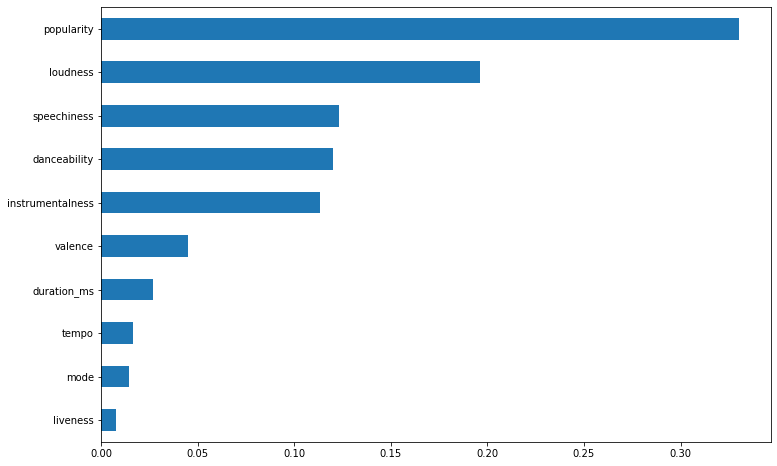

In [83]:
# visualizo Feature Importance
order_fea_imp.plot(kind='barh', figsize= (12,8));

### Predicción sobre TRAIN

In [84]:
# Prediccion sobre TRAIN
y_pred_rf_train = rnd_clf_opti.predict(X_train_scal)

Resultados Random Forest en TRAIN:


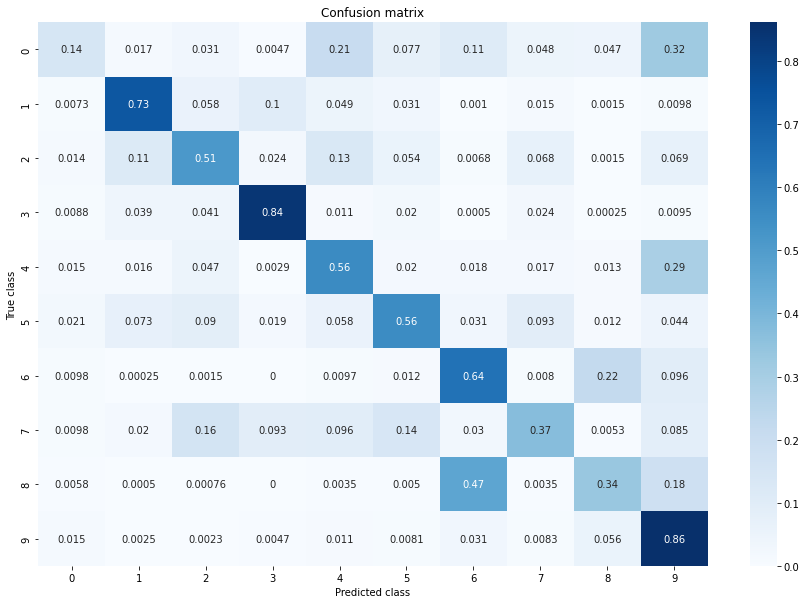

              precision    recall  f1-score   support

           0       0.57      0.14      0.23      3995
           1       0.72      0.73      0.73      3989
           2       0.54      0.51      0.53      3951
           3       0.77      0.84      0.81      3852
           4       0.49      0.56      0.53      4011
           5       0.60      0.56      0.58      3975
           6       0.48      0.64      0.55      3984
           7       0.57      0.37      0.45      3999
           8       0.49      0.34      0.40      3976
           9       0.44      0.86      0.58      3987

    accuracy                           0.55     39719
   macro avg       0.57      0.56      0.54     39719
weighted avg       0.57      0.55      0.54     39719



In [85]:
print('Resultados Random Forest en TRAIN:')
mostrar_resultados('TRAIN', y_train, y_pred_rf_train)

In [86]:
acierto = accuracy_score(y_train, y_pred_rf_train)
error = 1 - acierto

print('Score con Random Forest en TRAIN:\n-----------------------------')
print('Accuracy Train:', round(acierto*100,2),'%')
print('Error Train :', round(error*100,2),'%')

Score con Random Forest en TRAIN:
-----------------------------
Accuracy Train: 55.49 %
Error Train : 44.51 %


### Predicción sobre TEST

In [87]:
# Prediccion en Test
y_pred_rf_test = rnd_clf_opti.predict(X_test_scal)


Resultados Random Forest en TEST:


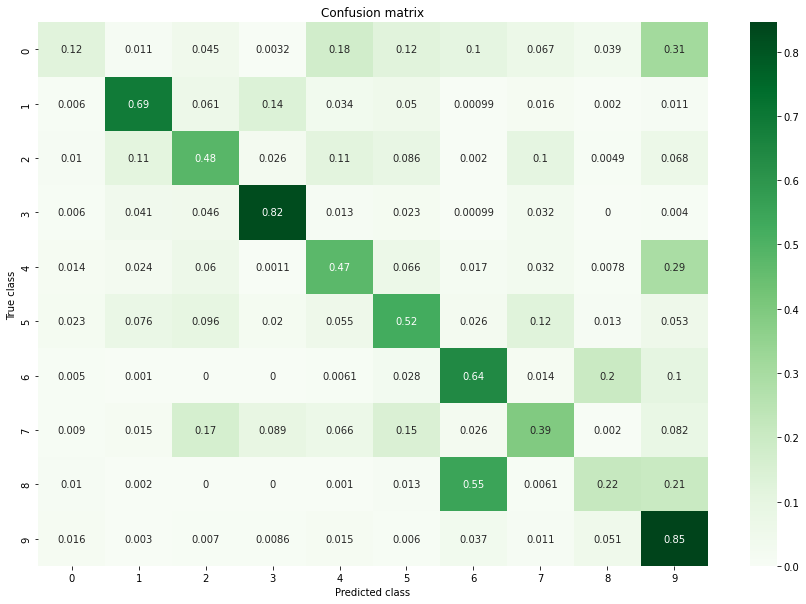

              precision    recall  f1-score   support

           0       0.55      0.12      0.20      1002
           1       0.71      0.69      0.70       987
           2       0.50      0.48      0.49      1000
           3       0.74      0.82      0.78       930
           4       0.50      0.47      0.49       986
           5       0.49      0.52      0.51      1008
           6       0.46      0.64      0.53      1015
           7       0.49      0.39      0.44       981
           8       0.40      0.22      0.28      1023
           9       0.43      0.85      0.57      1011

    accuracy                           0.52      9943
   macro avg       0.53      0.52      0.50      9943
weighted avg       0.52      0.52      0.50      9943



In [88]:
print('Resultados Random Forest en TEST:')
mostrar_resultados('TEST', y_test, y_pred_rf_test)

In [89]:
acierto = accuracy_score(y_test, y_pred_rf_test)
error = 1 - acierto

print('Score Random Forest en TEST:\n-----------------------------')
print("Accuracy test:", round(acierto*100, 2), "%")
print("Error test:", round(error*100, 2), "%")

Score Random Forest en TEST:
-----------------------------
Accuracy test: 51.83 %
Error test: 48.17 %


### Guardo CSV con resultados obtenidos en Random Forest en TEST

In [90]:
results_random = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred_rf_test,output_dict=True)).transpose()

results_random = results_random.add_prefix('RandomForest_')

results_models = pd.concat([results_log, results_tree.iloc[:,0:-1], results_svm1.iloc[:,0:-1], results_svm2.iloc[:,0:-1], results_random.iloc[:,0:-1]], axis=1)

results_models

,Support (Registros),LogReg_precision,LogReg_recall,LogReg_f1-score,DecTree_precision,DecTree_recall,DecTree_f1-score,SVM_Lin1_precision,SVM_Lin1_recall,SVM_Lin1_f1-score,SVM_Lin2_precision,SVM_Lin2_recall,SVM_Lin2_f1-score,RandomForest_precision,RandomForest_recall,RandomForest_f1-score
0,1002.000000,0.373156,0.252495,0.301190,0.369196,0.325349,0.345889,0.136578,0.086826,0.106162,0.138597,0.250499,0.178457,0.547945,0.119760,0.196560
1,987.000000,0.606673,0.607903,0.607287,0.730769,0.616008,0.668499,0.475497,0.727457,0.575090,0.492662,0.238095,0.321038,0.708333,0.688956,0.698511
2,1000.000000,0.482948,0.439000,0.459927,0.472769,0.408000,0.438003,0.049068,0.050000,0.049529,0.128000,0.224000,0.162909,0.501040,0.482000,0.491335
3,930.000000,0.729124,0.769892,0.748954,0.819461,0.751613,0.784072,0.625202,0.832258,0.714022,0.830626,0.384946,0.526084,0.743689,0.823656,0.781633
4,986.000000,0.383095,0.569980,0.458214,0.410035,0.240365,0.303069,0.194915,0.069980,0.102985,0.055556,0.001014,0.001992,0.497343,0.474645,0.485729
5,1008.000000,0.515641,0.506944,0.511256,0.352981,0.516865,0.419485,0.193593,0.137897,0.161066,0.193283,0.302579,0.235886,0.492063,0.522817,0.506975
6,1015.000000,0.481086,0.488670,0.484848,0.437026,0.283744,0.344086,0.086159,0.152709,0.110163,0.375635,0.072906,0.122112,0.455376,0.638424,0.531583
7,981.000000,0.445274,0.364934,0.401120,0.400000,0.397554,0.398773,0.113592,0.238532,0.153897,0.157798,0.175331,0.166103,0.491677,0.391437,0.435868
8,1023.000000,0.465621,0.377322,0.416847,0.429425,0.562072,0.486876,0.307087,0.038123,0.067826,0.277706,0.421310,0.334757,0.403255,0.217986,0.282995
9,1011.000000,0.506730,0.633037,0.562885,0.478114,0.702275,0.568910,0.415800,0.197824,0.268097,0.407122,0.418398,0.412683,0.426860,0.845697,0.567352


In [91]:
results_random.to_csv('models/random_forest_report_on_test_colifree.csv', index= True)

In [92]:
results_models.to_csv('models/models_report_on_test_colifree.csv', index= True)

### Tabla scores obtenidos

Almaceno los accuracys obtenidos en Random Forest

In [93]:
scores_obtained['Random_Forest(%)'] = [accuracy_score(y_train, y_pred_rf_train)*100,
                                    accuracy_score(y_test, y_pred_rf_test)*100]

scores_obtained

,Regresión logistica(%),Decision Tree(%),SVM_Lin1(%),SVM_Lin2(%),Ensemble(%),Random_Forest(%)
Accuracy_train,50.655857,57.539213,25.506684,24.894887,82.945190,55.492334
Accuracy_test,49.894398,47.892990,24.791310,24.881826,52.137182,51.825405


# 3.6. ADABOOST

### Importo librerias

In [94]:
from sklearn.ensemble import AdaBoostClassifier

### Preparo y entreno el modelo de Adaptive Boosting

In [95]:
# Arbol sencillo con 1 nivel de profundidad, con 200 arboles
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,
                algorithm='SAMME.R', learning_rate=0.5)

# Entreno con TRAIN
ada_clf.fit(X_train_scal,y_train.values.ravel())

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

### Feature Importance

In [96]:
order_fea_imp = pd.Series(ada_clf.feature_importances_, index=X_train_scal.columns).nlargest(10)[-1::-1]
order_fea_imp

key_DO#             0.020
tempo               0.045
liveness            0.045
valence             0.070
duration_ms         0.095
speechiness         0.100
instrumentalness    0.105
danceability        0.110
loudness            0.125
popularity          0.240
dtype: float64

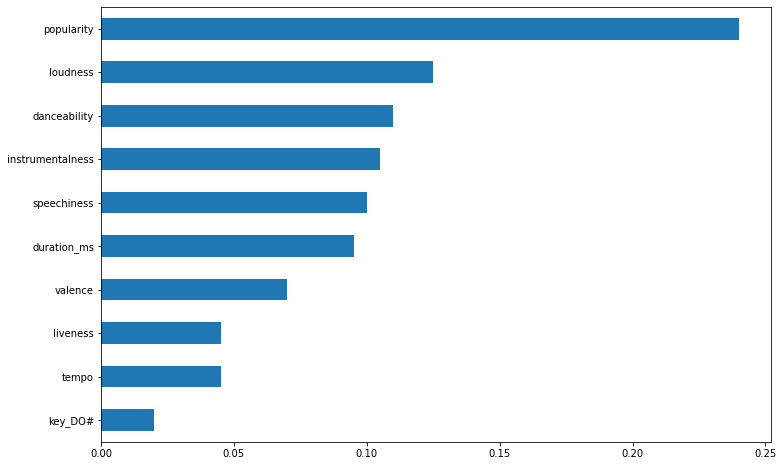

In [97]:
order_fea_imp.plot(kind='barh', figsize= (12,8));

### Prediccion de TRAIN

In [98]:
# Prediccion sobre TRAIN
y_pred_ada_train =ada_clf.predict(X_train_scal)

Resultados Ada Boosting en TRAIN:


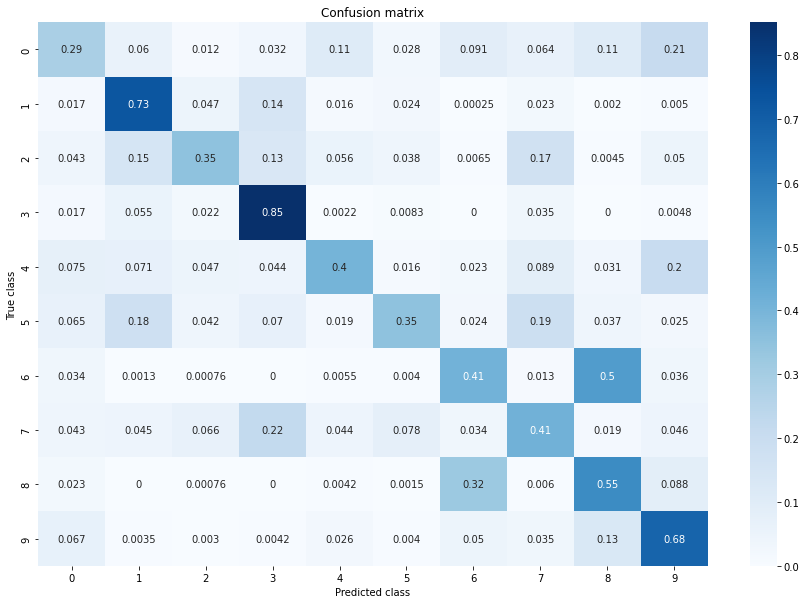

              precision    recall  f1-score   support

           0       0.43      0.29      0.34      3995
           1       0.56      0.73      0.64      3989
           2       0.59      0.35      0.44      3951
           3       0.57      0.85      0.68      3852
           4       0.59      0.40      0.48      4011
           5       0.63      0.35      0.45      3975
           6       0.43      0.41      0.42      3984
           7       0.40      0.41      0.41      3999
           8       0.40      0.55      0.46      3976
           9       0.50      0.68      0.58      3987

    accuracy                           0.50     39719
   macro avg       0.51      0.50      0.49     39719
weighted avg       0.51      0.50      0.49     39719



In [99]:
print('Resultados Ada Boosting en TRAIN:')
mostrar_resultados('TRAIN', y_train, y_pred_ada_train)

In [100]:
acierto = accuracy_score(y_train, y_pred_ada_train)
error = 1 - acierto

print('Score con Ada Boosting en TRAIN:\n-----------------------------')
print('Accuracy Train:', round(acierto*100,2),'%')
print('Error Train :', round(error*100,2),'%')

Score con Ada Boosting en TRAIN:
-----------------------------
Accuracy Train: 50.19 %
Error Train : 49.81 %


### Predicción sobre TEST

In [101]:
# Prediccion en Test
y_pred_ada_test = ada_clf.predict(X_test_scal)


Resultados Ada Boosting en TEST:


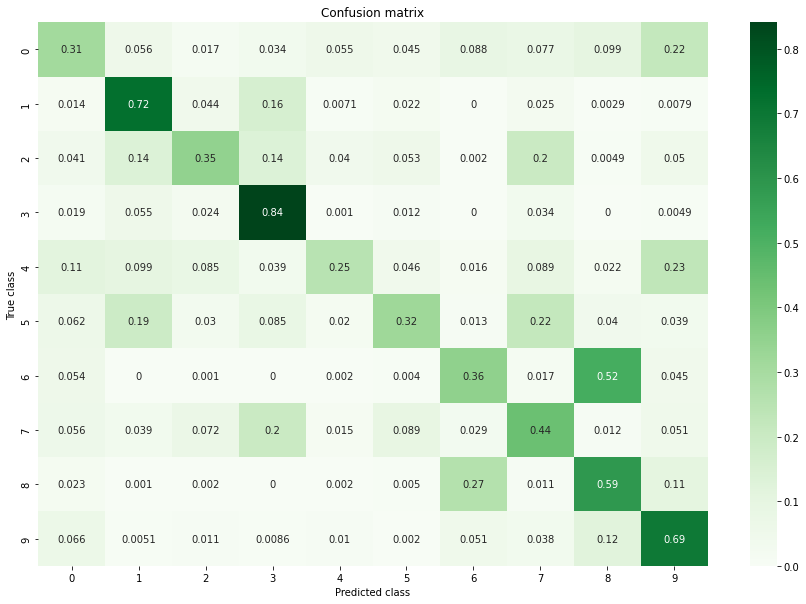

              precision    recall  f1-score   support

           0       0.41      0.31      0.35      1002
           1       0.55      0.72      0.63       987
           2       0.55      0.35      0.43      1000
           3       0.56      0.84      0.67       930
           4       0.62      0.25      0.36       986
           5       0.54      0.32      0.40      1008
           6       0.44      0.36      0.39      1015
           7       0.38      0.44      0.41       981
           8       0.42      0.59      0.49      1023
           9       0.48      0.69      0.56      1011

    accuracy                           0.48      9943
   macro avg       0.49      0.49      0.47      9943
weighted avg       0.49      0.48      0.47      9943



In [102]:
print('Resultados Ada Boosting en TEST:')
mostrar_resultados('TEST', y_test, y_pred_ada_test)

In [103]:
acierto = accuracy_score(y_test, y_pred_ada_test)
error = 1 - acierto

print('Score Ada Boosting en TEST:\n-----------------------------')
print("Accuracy test:", round(acierto*100, 2), "%")
print("Error test:", round(error*100, 2), "%")

Score Ada Boosting en TEST:
-----------------------------
Accuracy test: 48.49 %
Error test: 51.51 %


### Guardo CSV con resultados obtenidos en Ada Boosting en TEST

In [104]:
results_adaboost = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred_ada_test,output_dict=True)).transpose()

results_adaboost = results_adaboost.add_prefix('AdaBoost_')

results_models = pd.concat([results_log, results_tree.iloc[:,0:-1], results_svm1.iloc[:,0:-1], results_svm2.iloc[:,0:-1], results_random.iloc[:,0:-1], results_adaboost.iloc[:,0:-1]], axis=1)

results_models

,Support (Registros),LogReg_precision,LogReg_recall,LogReg_f1-score,DecTree_precision,DecTree_recall,DecTree_f1-score,SVM_Lin1_precision,SVM_Lin1_recall,SVM_Lin1_f1-score,SVM_Lin2_precision,SVM_Lin2_recall,SVM_Lin2_f1-score,RandomForest_precision,RandomForest_recall,RandomForest_f1-score,AdaBoost_precision,AdaBoost_recall,AdaBoost_f1-score
0,1002.000000,0.373156,0.252495,0.301190,0.369196,0.325349,0.345889,0.136578,0.086826,0.106162,0.138597,0.250499,0.178457,0.547945,0.119760,0.196560,0.411067,0.311377,0.354344
1,987.000000,0.606673,0.607903,0.607287,0.730769,0.616008,0.668499,0.475497,0.727457,0.575090,0.492662,0.238095,0.321038,0.708333,0.688956,0.698511,0.554264,0.724417,0.628019
2,1000.000000,0.482948,0.439000,0.459927,0.472769,0.408000,0.438003,0.049068,0.050000,0.049529,0.128000,0.224000,0.162909,0.501040,0.482000,0.491335,0.549606,0.349000,0.426911
3,930.000000,0.729124,0.769892,0.748954,0.819461,0.751613,0.784072,0.625202,0.832258,0.714022,0.830626,0.384946,0.526084,0.743689,0.823656,0.781633,0.558971,0.840860,0.671533
4,986.000000,0.383095,0.569980,0.458214,0.410035,0.240365,0.303069,0.194915,0.069980,0.102985,0.055556,0.001014,0.001992,0.497343,0.474645,0.485729,0.624060,0.252535,0.359567
5,1008.000000,0.515641,0.506944,0.511256,0.352981,0.516865,0.419485,0.193593,0.137897,0.161066,0.193283,0.302579,0.235886,0.492063,0.522817,0.506975,0.535774,0.319444,0.400249
6,1015.000000,0.481086,0.488670,0.484848,0.437026,0.283744,0.344086,0.086159,0.152709,0.110163,0.375635,0.072906,0.122112,0.455376,0.638424,0.531583,0.435096,0.356650,0.391987
7,981.000000,0.445274,0.364934,0.401120,0.400000,0.397554,0.398773,0.113592,0.238532,0.153897,0.157798,0.175331,0.166103,0.491677,0.391437,0.435868,0.381206,0.438328,0.407776
8,1023.000000,0.465621,0.377322,0.416847,0.429425,0.562072,0.486876,0.307087,0.038123,0.067826,0.277706,0.421310,0.334757,0.403255,0.217986,0.282995,0.418524,0.587488,0.488817
9,1011.000000,0.506730,0.633037,0.562885,0.478114,0.702275,0.568910,0.415800,0.197824,0.268097,0.407122,0.418398,0.412683,0.426860,0.845697,0.567352,0.477459,0.691395,0.564848


In [105]:
results_adaboost.to_csv('models/ada_boosting_report_on_test_colifree.csv', index= True)

In [106]:
results_models.to_csv('models/models_report_on_test_colifree.csv', index= True)

### Tabla scores obtenidos

Almaceno los accuracys obtenidos en Ada Boosting

In [107]:
scores_obtained['Ada Boosting(%)'] = [accuracy_score(y_train, y_pred_ada_train)*100,
                                    accuracy_score(y_test, y_pred_ada_test)*100]

scores_obtained

,Regresión logistica(%),Decision Tree(%),SVM_Lin1(%),SVM_Lin2(%),Ensemble(%),Random_Forest(%),Ada Boosting(%)
Accuracy_train,50.655857,57.539213,25.506684,24.894887,82.945190,55.492334,50.190085
Accuracy_test,49.894398,47.892990,24.791310,24.881826,52.137182,51.825405,48.486372


# 3.7. GRADIENT BOOSTING CLASIFFIER

### Importo librerias

In [108]:
from sklearn.ensemble import GradientBoostingClassifier

### Preparo el modelo y lo entreno

In [109]:
# Modelo Gradient Boosting
grad_boost_clf = GradientBoostingClassifier()

# Entreno
grad_boost_clf.fit(X_train_scal, y_train.values.ravel())

GradientBoostingClassifier()

### Grid Search para detectar que parametros son los más optimos

In [110]:
'''
parameters = {#"learning_rate": [0.1, 0.3],  # Cuanto más alto, mas aporta cada nuevo arbol
            "n_estimators": [50,100]} # No pongo muchos estimadores para no sobreajustar el modelo
            #"max_depth": [2,3], # No es necesario poner una profundiad muy alta, cada nuevo arbol va corrigiendo el error de los anteriores.
            #"max_features": ["sqrt", 3]} # Igual que en el random forest

# Validacion cruzada con cv= 10, para suavizar el overfitting
grid_gradient = GridSearchCV(grad_boost_clf, parameters, scoring= 'accuracy', cv=10)

grid_gradient.fit(X_train_scal, y_train.values.ravel())

print(grid_gradient.best_estimator_)
print(grid_gradient.best_score_)
print(grid_gradient.best_params_)
'''

'\nparameters = {#"learning_rate": [0.1, 0.3],  # Cuanto más alto, mas aporta cada nuevo arbol\n            "n_estimators": [50,100]} # No pongo muchos estimadores para no sobreajustar el modelo\n            #"max_depth": [2,3], # No es necesario poner una profundiad muy alta, cada nuevo arbol va corrigiendo el error de los anteriores.\n            #"max_features": ["sqrt", 3]} # Igual que en el random forest\n\n# Validacion cruzada con cv= 10, para suavizar el overfitting\ngrid_gradient = GridSearchCV(grad_boost_clf, parameters, scoring= \'accuracy\', cv=10)\n\ngrid_gradient.fit(X_train_scal, y_train.values.ravel())\n\nprint(grid_gradient.best_estimator_)\nprint(grid_gradient.best_score_)\nprint(grid_gradient.best_params_)\n'

### Preparo de nuevo el modelo con los parametros más optimos detectados con el gridSearch

In [111]:
# Modelo Gradient Boosting
grad_boost_clf_opti = GradientBoostingClassifier(learning_rate= 0.3, n_estimators= 100, max_features= 4)

# Entreno
grad_boost_clf_opti.fit(X_train_scal, y_train)

C:\Users\MartaBuesa\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.3, max_features=4)

### Feature Importance

In [112]:
order_fea_imp = pd.Series(grad_boost_clf_opti.feature_importances_, index=X_train_scal.columns).nlargest(10)[-1::-1]
order_fea_imp

mode                0.013451
liveness            0.014182
tempo               0.020350
duration_ms         0.029864
valence             0.046468
instrumentalness    0.096634
danceability        0.114321
speechiness         0.134144
loudness            0.179525
popularity          0.342002
dtype: float64

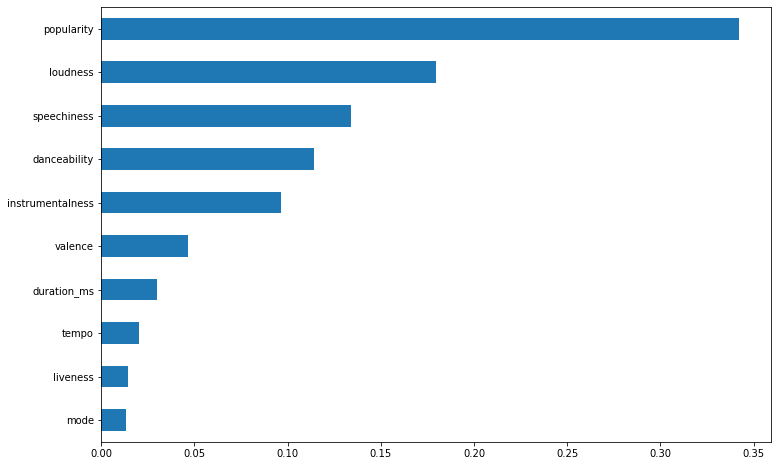

In [113]:
order_fea_imp.plot(kind='barh', figsize= (12,8));

### Prediccion de TRAIN

In [114]:
# Prediccion sobre TRAIN
y_pred_grad_train = grad_boost_clf_opti.predict(X_train_scal)


Resultados Gradient Boosting en TRAIN:


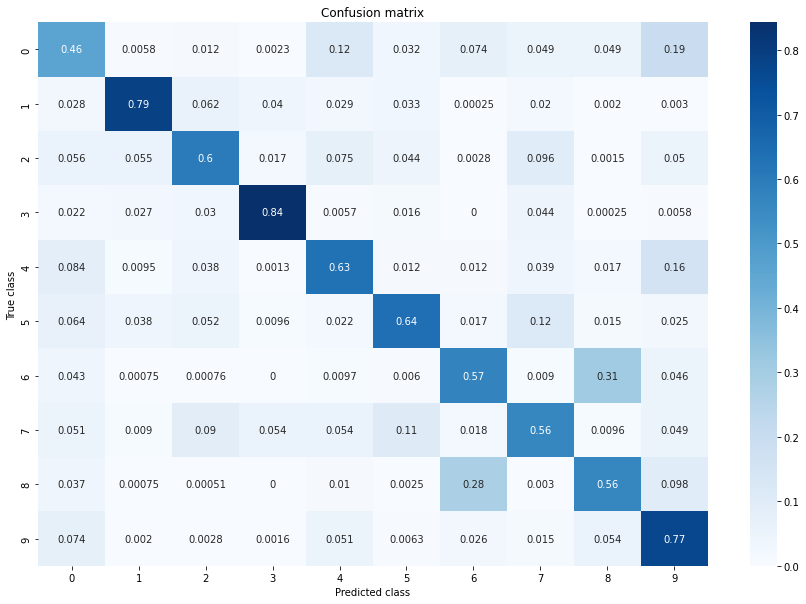

              precision    recall  f1-score   support

           0       0.50      0.46      0.48      3995
           1       0.84      0.79      0.81      3989
           2       0.68      0.60      0.64      3951
           3       0.87      0.84      0.86      3852
           4       0.63      0.63      0.63      4011
           5       0.71      0.64      0.67      3975
           6       0.57      0.57      0.57      3984
           7       0.59      0.56      0.58      3999
           8       0.55      0.56      0.56      3976
           9       0.55      0.77      0.64      3987

    accuracy                           0.64     39719
   macro avg       0.65      0.64      0.64     39719
weighted avg       0.65      0.64      0.64     39719



In [115]:
print('Resultados Gradient Boosting en TRAIN:')
mostrar_resultados('TRAIN', y_train, y_pred_grad_train)

In [116]:
acierto = accuracy_score(y_train, y_pred_grad_train)
error = 1 - acierto

print('Score con Gradient Boosting en TRAIN:\n-----------------------------')
print('Accuracy Train:', round(acierto*100,2),'%')
print('Error Train :', round(error*100,2),'%')

Score con Gradient Boosting en TRAIN:
-----------------------------
Accuracy Train: 64.27 %
Error Train : 35.73 %


### Predicción sobre TEST

In [117]:
# Prediccion en Test
y_pred_grad_test = grad_boost_clf_opti.predict(X_test_scal)


Resultados Gradient Boosting en TEST:


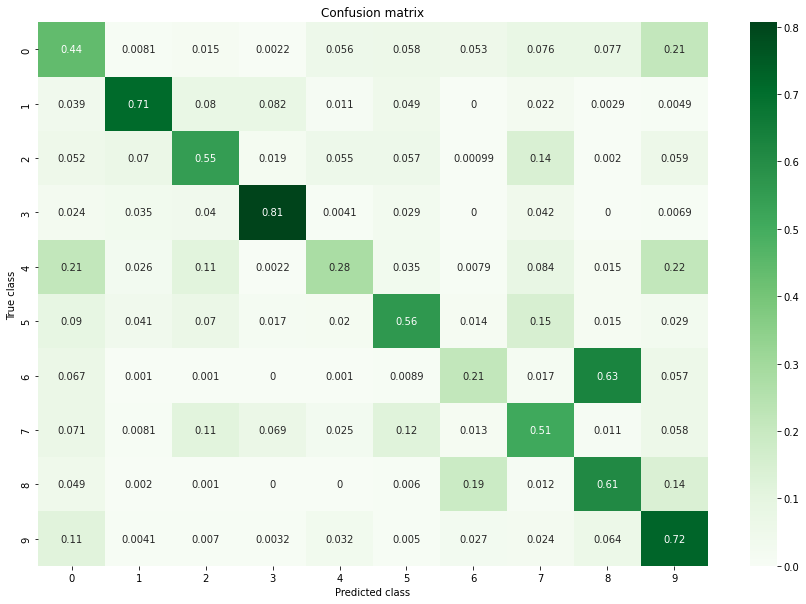

              precision    recall  f1-score   support

           0       0.38      0.44      0.41      1002
           1       0.78      0.71      0.75       987
           2       0.56      0.55      0.55      1000
           3       0.81      0.81      0.81       930
           4       0.58      0.28      0.37       986
           5       0.61      0.56      0.58      1008
           6       0.42      0.21      0.28      1015
           7       0.47      0.51      0.49       981
           8       0.43      0.61      0.50      1023
           9       0.48      0.72      0.58      1011

    accuracy                           0.54      9943
   macro avg       0.55      0.54      0.53      9943
weighted avg       0.55      0.54      0.53      9943



In [118]:
print('Resultados Gradient Boosting en TEST:')
mostrar_resultados('TEST', y_test, y_pred_grad_test)

In [119]:
acierto = accuracy_score(y_test, y_pred_grad_test)
error = 1 - acierto

print('Score Gradient Boosting en TEST:\n-----------------------------')
print("Accuracy test:", round(acierto*100, 2), "%")
print("Error test:", round(error*100, 2), "%")

Score Gradient Boosting en TEST:
-----------------------------
Accuracy test: 53.82 %
Error test: 46.18 %


### Guardo CSV con resultados obtenidos en Gradient Boosting en TEST

In [120]:
results_gradboost = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred_grad_test,output_dict=True)).transpose()

results_gradboost = results_gradboost.add_prefix('GradBoost_')

results_models = pd.concat([results_log, results_tree.iloc[:,0:-1], results_svm1.iloc[:,0:-1], results_svm2.iloc[:,0:-1], results_random.iloc[:,0:-1], results_adaboost.iloc[:,0:-1], results_gradboost.iloc[:,0:-1]], axis=1)

results_models

,Support (Registros),LogReg_precision,LogReg_recall,LogReg_f1-score,DecTree_precision,DecTree_recall,DecTree_f1-score,SVM_Lin1_precision,SVM_Lin1_recall,SVM_Lin1_f1-score,...,SVM_Lin2_f1-score,RandomForest_precision,RandomForest_recall,RandomForest_f1-score,AdaBoost_precision,AdaBoost_recall,AdaBoost_f1-score,GradBoost_precision,GradBoost_recall,GradBoost_f1-score
0,1002.000000,0.373156,0.252495,0.301190,0.369196,0.325349,0.345889,0.136578,0.086826,0.106162,...,0.178457,0.547945,0.119760,0.196560,0.411067,0.311377,0.354344,0.379518,0.440120,0.407579
1,987.000000,0.606673,0.607903,0.607287,0.730769,0.616008,0.668499,0.475497,0.727457,0.575090,...,0.321038,0.708333,0.688956,0.698511,0.554264,0.724417,0.628019,0.784358,0.711246,0.746015
2,1000.000000,0.482948,0.439000,0.459927,0.472769,0.408000,0.438003,0.049068,0.050000,0.049529,...,0.162909,0.501040,0.482000,0.491335,0.549606,0.349000,0.426911,0.556008,0.546000,0.550959
3,930.000000,0.729124,0.769892,0.748954,0.819461,0.751613,0.784072,0.625202,0.832258,0.714022,...,0.526084,0.743689,0.823656,0.781633,0.558971,0.840860,0.671533,0.805585,0.806452,0.806018
4,986.000000,0.383095,0.569980,0.458214,0.410035,0.240365,0.303069,0.194915,0.069980,0.102985,...,0.001992,0.497343,0.474645,0.485729,0.624060,0.252535,0.359567,0.575630,0.277890,0.374829
5,1008.000000,0.515641,0.506944,0.511256,0.352981,0.516865,0.419485,0.193593,0.137897,0.161066,...,0.235886,0.492063,0.522817,0.506975,0.535774,0.319444,0.400249,0.607487,0.563492,0.584663
6,1015.000000,0.481086,0.488670,0.484848,0.437026,0.283744,0.344086,0.086159,0.152709,0.110163,...,0.122112,0.455376,0.638424,0.531583,0.435096,0.356650,0.391987,0.416031,0.214778,0.283301
7,981.000000,0.445274,0.364934,0.401120,0.400000,0.397554,0.398773,0.113592,0.238532,0.153897,...,0.166103,0.491677,0.391437,0.435868,0.381206,0.438328,0.407776,0.471698,0.509684,0.489956
8,1023.000000,0.465621,0.377322,0.416847,0.429425,0.562072,0.486876,0.307087,0.038123,0.067826,...,0.334757,0.403255,0.217986,0.282995,0.418524,0.587488,0.488817,0.427491,0.608016,0.502018
9,1011.000000,0.506730,0.633037,0.562885,0.478114,0.702275,0.568910,0.415800,0.197824,0.268097,...,0.412683,0.426860,0.845697,0.567352,0.477459,0.691395,0.564848,0.479317,0.722057,0.576164


In [121]:
results_gradboost.to_csv('models/gradient_boosting_report_on_test_colifree.csv', index= True)

In [122]:
results_models.to_csv('models/models_report_on_test_colifree.csv', index= True)

### Tabla scores obtenidos

Almaceno los accuracys obtenidos en Gradient Boosting

In [123]:
scores_obtained['Gradient Boosting(%)'] = [accuracy_score(y_train, y_pred_grad_train)*100,
                                    accuracy_score(y_test, y_pred_grad_test)*100]

scores_obtained

,Regresión logistica(%),Decision Tree(%),SVM_Lin1(%),SVM_Lin2(%),Ensemble(%),Random_Forest(%),Ada Boosting(%),Gradient Boosting(%)
Accuracy_train,50.655857,57.539213,25.506684,24.894887,82.945190,55.492334,50.190085,64.268990
Accuracy_test,49.894398,47.892990,24.791310,24.881826,52.137182,51.825405,48.486372,53.816756


# 3.8. XG BOOSTING CLASIFFIER

### Importo librerias

In [124]:
from xgboost import XGBClassifier

### Preparo el modelo y entreno

In [125]:

# Modelo XG Boosting
xgboost_clf = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric = 'logloss')

xgboost_clf.fit(X_train_scal, y_train.values.ravel())
#results_xgb = model_selection.cross_val_score(model, X_train_scal, y_train, cv=10).mean()
#results_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

### Feature Importance

In [126]:
order_fea_imp = pd.Series(xgboost_clf.feature_importances_, index=X_train_scal.columns).nlargest(10)[-1::-1]
order_fea_imp

key_DO#             0.024975
tempo               0.026523
duration_ms         0.031541
valence             0.042387
danceability        0.064996
instrumentalness    0.071173
mode                0.074550
speechiness         0.080600
loudness            0.110994
popularity          0.253060
dtype: float32

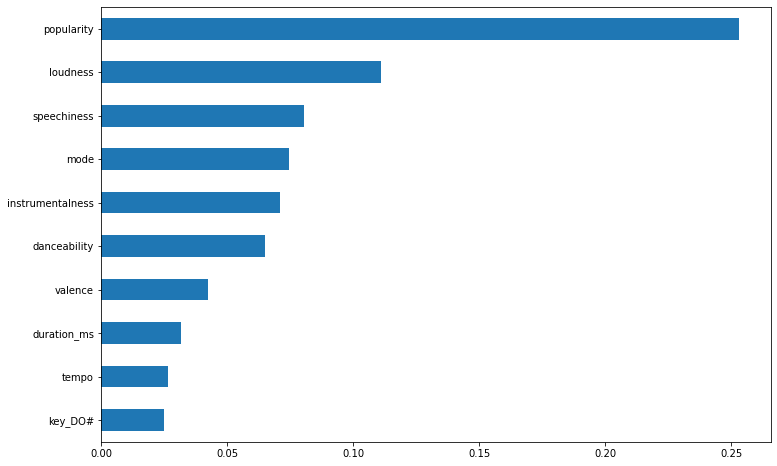

In [127]:
order_fea_imp.plot(kind='barh', figsize= (12,8));

### Prediccion de TRAIN

In [128]:
# Prediccion sobre TRAIN
y_pred_xgboost_train = xgboost_clf.predict(X_train_scal)


Resultados XG Boosting en TRAIN:


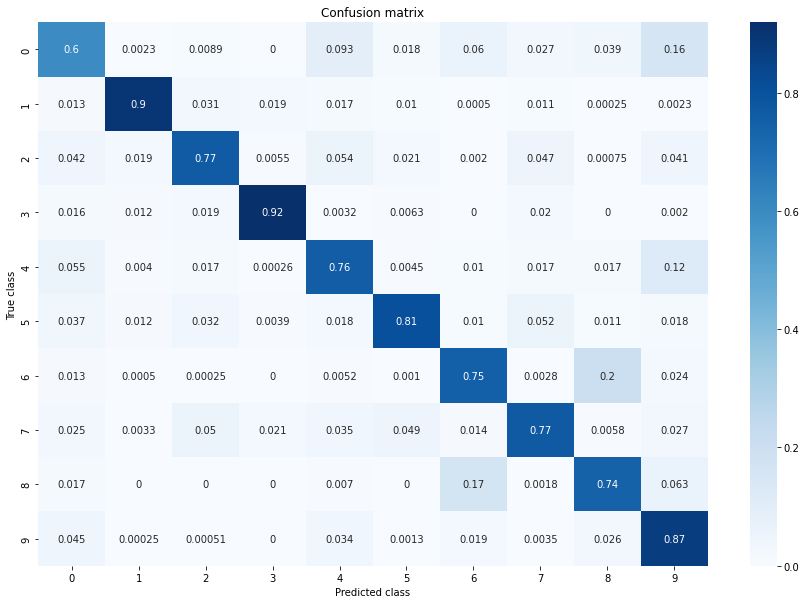

              precision    recall  f1-score   support

           0       0.69      0.60      0.64      3995
           1       0.94      0.90      0.92      3989
           2       0.83      0.77      0.80      3951
           3       0.95      0.92      0.93      3852
           4       0.74      0.76      0.75      4011
           5       0.88      0.81      0.84      3975
           6       0.73      0.75      0.74      3984
           7       0.81      0.77      0.79      3999
           8       0.71      0.74      0.73      3976
           9       0.66      0.87      0.75      3987

    accuracy                           0.79     39719
   macro avg       0.79      0.79      0.79     39719
weighted avg       0.79      0.79      0.79     39719



In [129]:
print('Resultados XG Boosting en TRAIN:')
mostrar_resultados('TRAIN', y_train, y_pred_xgboost_train)

In [130]:
acierto = accuracy_score(y_train, y_pred_xgboost_train)
error = 1 - acierto

print('Score con XG Boosting en TRAIN:\n-----------------------------')
print('Accuracy Train:', round(acierto*100,2),'%')
print('Error Train :', round(error*100,2),'%')

Score con XG Boosting en TRAIN:
-----------------------------
Accuracy Train: 78.71 %
Error Train : 21.29 %


### Predicción sobre TEST

In [131]:
# Prediccion en Test
y_pred_xgboost_test = xgboost_clf.predict(X_test_scal)


Resultados XG Boosting en TEST:


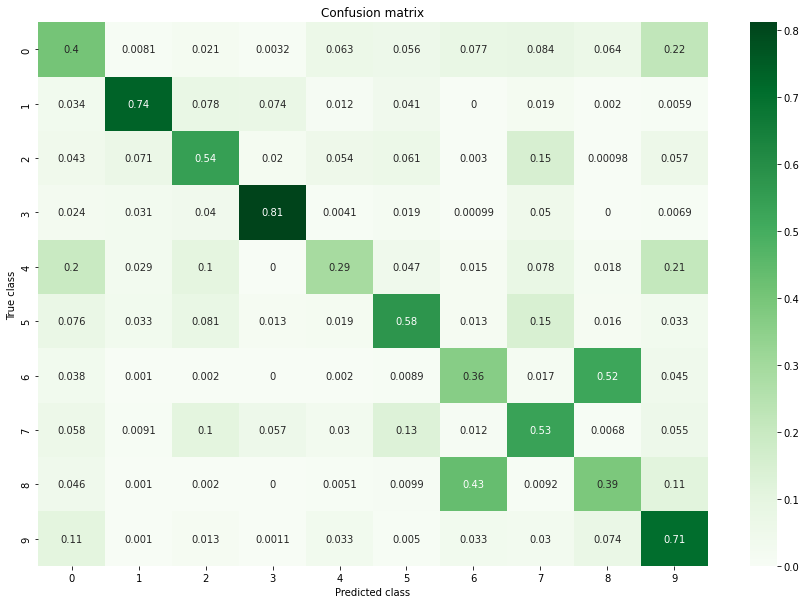

              precision    recall  f1-score   support

           0       0.39      0.40      0.40      1002
           1       0.80      0.74      0.77       987
           2       0.55      0.54      0.55      1000
           3       0.83      0.81      0.82       930
           4       0.57      0.29      0.38       986
           5       0.61      0.58      0.59      1008
           6       0.38      0.36      0.37      1015
           7       0.48      0.53      0.50       981
           8       0.36      0.39      0.37      1023
           9       0.49      0.71      0.58      1011

    accuracy                           0.53      9943
   macro avg       0.54      0.53      0.53      9943
weighted avg       0.54      0.53      0.53      9943



In [132]:
print('Resultados XG Boosting en TEST:')
mostrar_resultados('TEST', y_test, y_pred_xgboost_test)

In [133]:
acierto = accuracy_score(y_test, y_pred_xgboost_test)
error = 1 - acierto

print('Score XG Boosting en TEST:\n-----------------------------')
print("Accuracy test:", round(acierto*100, 2), "%")
print("Error test:", round(error*100, 2), "%")

Score XG Boosting en TEST:
-----------------------------
Accuracy test: 53.26 %
Error test: 46.74 %


### Guardo CSV con resultados obtenidos en XG Boosting en TEST

In [134]:
results_xgboost = pd.DataFrame(classification_report(y_true = y_test, y_pred = y_pred_xgboost_test,output_dict=True)).transpose()

results_xgboost = results_xgboost.add_prefix('XGBoost_')

results_models = pd.concat([results_log, results_tree.iloc[:,0:-1], results_svm1.iloc[:,0:-1], results_svm2.iloc[:,0:-1], results_random.iloc[:,0:-1], results_adaboost.iloc[:,0:-1], results_gradboost.iloc[:,0:-1], results_xgboost.iloc[:,0:-1]], axis=1)

results_models

,Support (Registros),LogReg_precision,LogReg_recall,LogReg_f1-score,DecTree_precision,DecTree_recall,DecTree_f1-score,SVM_Lin1_precision,SVM_Lin1_recall,SVM_Lin1_f1-score,...,RandomForest_f1-score,AdaBoost_precision,AdaBoost_recall,AdaBoost_f1-score,GradBoost_precision,GradBoost_recall,GradBoost_f1-score,XGBoost_precision,XGBoost_recall,XGBoost_f1-score
0,1002.000000,0.373156,0.252495,0.301190,0.369196,0.325349,0.345889,0.136578,0.086826,0.106162,...,0.196560,0.411067,0.311377,0.354344,0.379518,0.440120,0.407579,0.393586,0.404192,0.398818
1,987.000000,0.606673,0.607903,0.607287,0.730769,0.616008,0.668499,0.475497,0.727457,0.575090,...,0.698511,0.554264,0.724417,0.628019,0.784358,0.711246,0.746015,0.798680,0.735562,0.765823
2,1000.000000,0.482948,0.439000,0.459927,0.472769,0.408000,0.438003,0.049068,0.050000,0.049529,...,0.491335,0.549606,0.349000,0.426911,0.556008,0.546000,0.550959,0.550152,0.543000,0.546553
3,930.000000,0.729124,0.769892,0.748954,0.819461,0.751613,0.784072,0.625202,0.832258,0.714022,...,0.781633,0.558971,0.840860,0.671533,0.805585,0.806452,0.806018,0.827851,0.811828,0.819761
4,986.000000,0.383095,0.569980,0.458214,0.410035,0.240365,0.303069,0.194915,0.069980,0.102985,...,0.485729,0.624060,0.252535,0.359567,0.575630,0.277890,0.374829,0.565217,0.290061,0.383378
5,1008.000000,0.515641,0.506944,0.511256,0.352981,0.516865,0.419485,0.193593,0.137897,0.161066,...,0.506975,0.535774,0.319444,0.400249,0.607487,0.563492,0.584663,0.607106,0.576389,0.591349
6,1015.000000,0.481086,0.488670,0.484848,0.437026,0.283744,0.344086,0.086159,0.152709,0.110163,...,0.531583,0.435096,0.356650,0.391987,0.416031,0.214778,0.283301,0.381497,0.361576,0.371270
7,981.000000,0.445274,0.364934,0.401120,0.400000,0.397554,0.398773,0.113592,0.238532,0.153897,...,0.435868,0.381206,0.438328,0.407776,0.471698,0.509684,0.489956,0.476321,0.533129,0.503127
8,1023.000000,0.465621,0.377322,0.416847,0.429425,0.562072,0.486876,0.307087,0.038123,0.067826,...,0.282995,0.418524,0.587488,0.488817,0.427491,0.608016,0.502018,0.355476,0.387097,0.370613
9,1011.000000,0.506730,0.633037,0.562885,0.478114,0.702275,0.568910,0.415800,0.197824,0.268097,...,0.567352,0.477459,0.691395,0.564848,0.479317,0.722057,0.576164,0.486045,0.706231,0.575806


In [135]:
results_xgboost.to_csv('models/xg_boosting_report_on_test_colifree.csv', index= True)

In [136]:
results_models.to_csv('models/models_report_on_test_colifree.csv', index= True)

### Tabla scores obtenidos

Almaceno los accuracys obtenidos en XG Boosting

In [137]:
scores_obtained['XG Boosting(%)'] = [accuracy_score(y_train, y_pred_xgboost_train)*100,
                                    accuracy_score(y_test, y_pred_xgboost_test)*100]

scores_obtained

,Regresión logistica(%),Decision Tree(%),SVM_Lin1(%),SVM_Lin2(%),Ensemble(%),Random_Forest(%),Ada Boosting(%),Gradient Boosting(%),XG Boosting(%)
Accuracy_train,50.655857,57.539213,25.506684,24.894887,82.945190,55.492334,50.190085,64.268990,78.712959
Accuracy_test,49.894398,47.892990,24.791310,24.881826,52.137182,51.825405,48.486372,53.816756,53.263603


# 3.9. RED NEURONAL

### Desarrollado modelo de red neuronal con Perceptron en notebook Parte IV del estudio.

### Para comparabilidad traigo aqui los resultados obtenidos: